<a href="https://colab.research.google.com/github/ohjeonsuk/R/blob/master/L230908.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 파이썬 생활프로그래밍 Chap. 5

5. DB : MySQL

6. Django : 블로그

7. 통계적 머신러닝

8. 딥러닝

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df2 = pd.read_csv('survey.csv')

In [ ]:
df2.head()

sex  income  English  jobSatisfaction  stress
0   m    3000      500                5       5
1   f    4000      600                4       4
2   f    5000      700                3       2
3   m    6000      800                2       2
4   m    4000      700                2       5

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              23 non-null     object
 1   income           23 non-null     int64 
 2   English          23 non-null     int64 
 3   jobSatisfaction  23 non-null     int64 
 4   stress           23 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.0+ KB


In [ ]:
df2.mean()

<ipython-input-6-4a56ca50fe8e>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.mean()


income             4304.217391
English             608.695652
jobSatisfaction       3.304348
stress                3.347826
dtype: float64

In [ ]:
df2.income.mean()

4304.217391304348

In [ ]:
df2.income.sum()


98997

In [ ]:
df2.income.median()

4999.0

In [ ]:
df2.groupby(df2.sex).mean()

income     English  jobSatisfaction    stress
sex                                                    
f    4333.111111  633.333333         3.666667  3.111111
m    4285.642857  592.857143         3.071429  3.500000

In [ ]:
from scipy import stats

In [ ]:
grouped = df2.groupby(['sex'])

In [ ]:
for key, group in grouped:
    print(key)
    print(group)

f
   sex  income  English  jobSatisfaction  stress
1    f    4000      600                4       4
2    f    5000      700                3       2
8    f    4999      600                4       3
9    f    5000      700                5       4
14   f    4000      700                2       4
15   f    3000      600                1       2
20   f    4999      600                4       2
21   f    5000      700                5       3
22   f    3000      500                5       4
m
   sex  income  English  jobSatisfaction  stress
0    m    3000      500                5       5
3    m    6000      800                2       2
4    m    4000      700                2       5
5    m    3000      600                1       5
6    m    3000      500                3       1
7    m    5000      500                3       2
10   m    3000      500                5       5
11   m    4000      600                4       4
12   m    5000      700                3       2
13   m    6000  

<ipython-input-13-a3d194219d09>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for key, group in grouped:


In [ ]:
m = grouped.get_group('m')['income']

In [ ]:
f = grouped.get_group('f')['income']

In [ ]:
m

0     3000
3     6000
4     4000
5     3000
6     3000
7     5000
10    3000
11    4000
12    5000
13    6000
16    3000
17    5000
18    4999
19    5000
Name: income, dtype: int64

In [ ]:
f

1     4000
2     5000
8     4999
9     5000
14    4000
15    3000
20    4999
21    5000
22    3000
Name: income, dtype: int64

In [ ]:
result = stats.ttest_ind(m, f) # 등분산의 방식

In [ ]:
result

Ttest_indResult(statistic=-0.10650308143428425, pvalue=0.9161940781163369)

0.916, p-value < 0.05 작아야 m, f 의 평균의 차이가 유의하다.

m, f의 차이가 없다


In [ ]:
result = stats.ttest_ind(m, f, equal_var=False)

In [ ]:
alpha = 0.01 #1%, 5%

In [ ]:
p_value = result[1]

In [ ]:
p_value

0.9110040604727456

In [ ]:
if p_value < alpha :
    print('두 평균에 차이가 있습니다.')
else:
    print('두 평균에 차이가 없습니다.')

두 평균에 차이가 없습니다.


ttest_ind 함수의 가정 : two-sample t-test

1. 표본의 독립성

2. 모집단 정규성

3. 등분산성

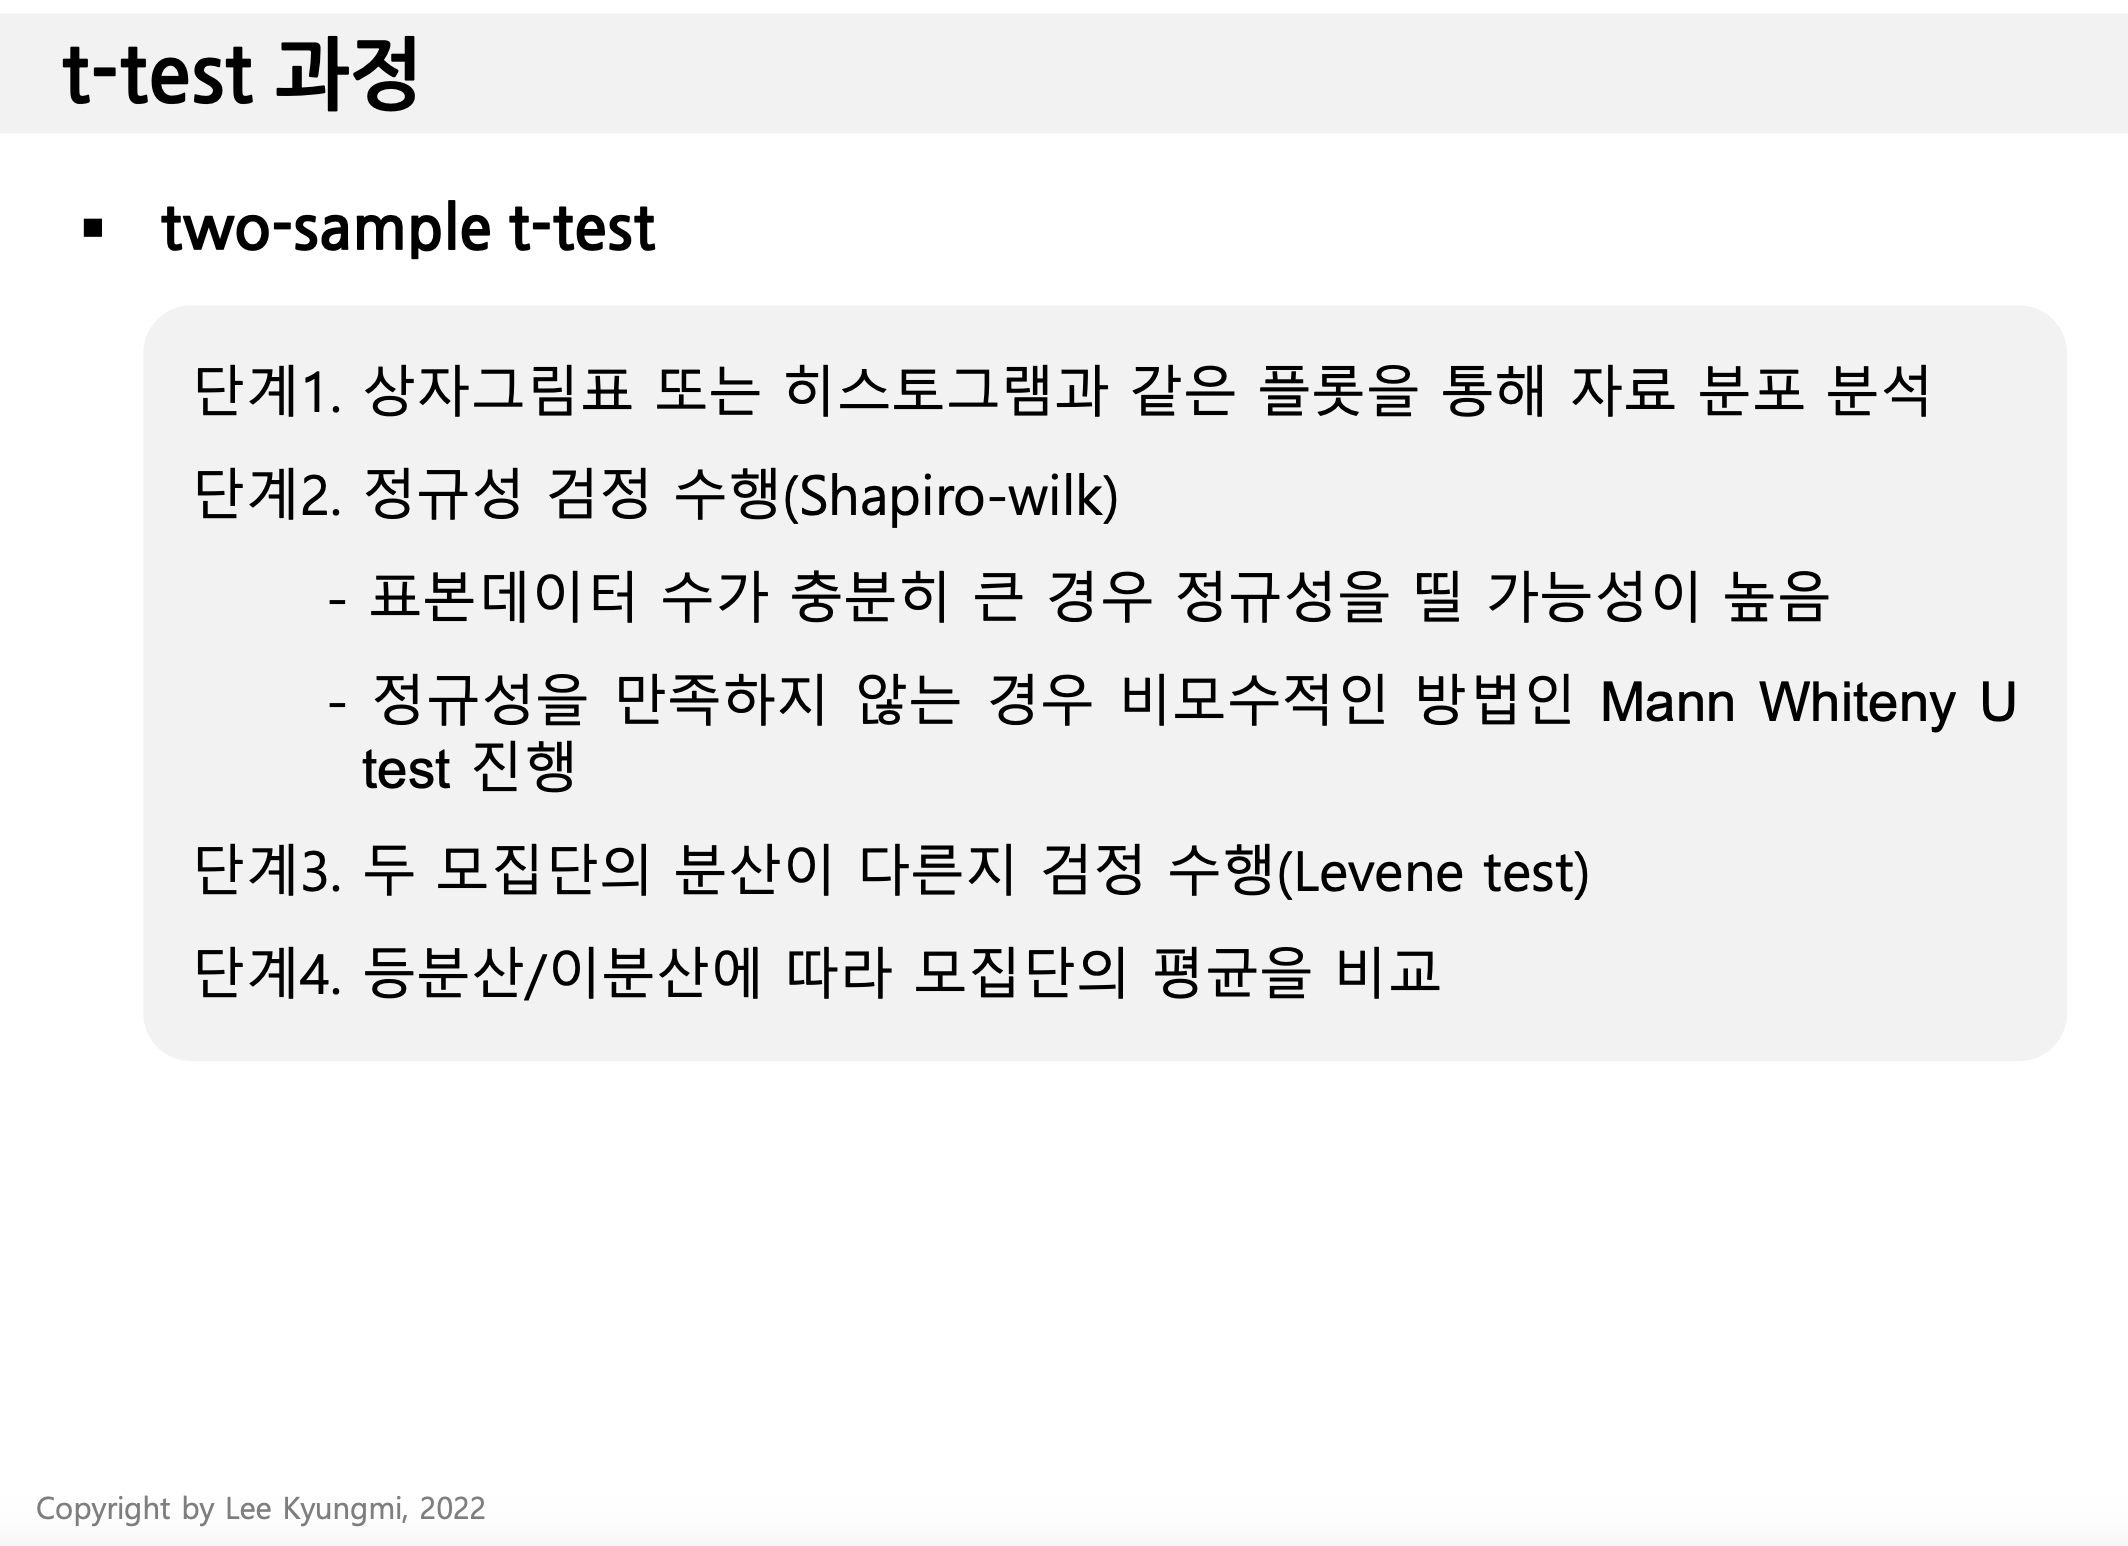

파이썬 데이터과학 통계학습 189쪽에 의하면 등분산을 표본 분산으로 설명하고 있다.

1. 모집단과 표본

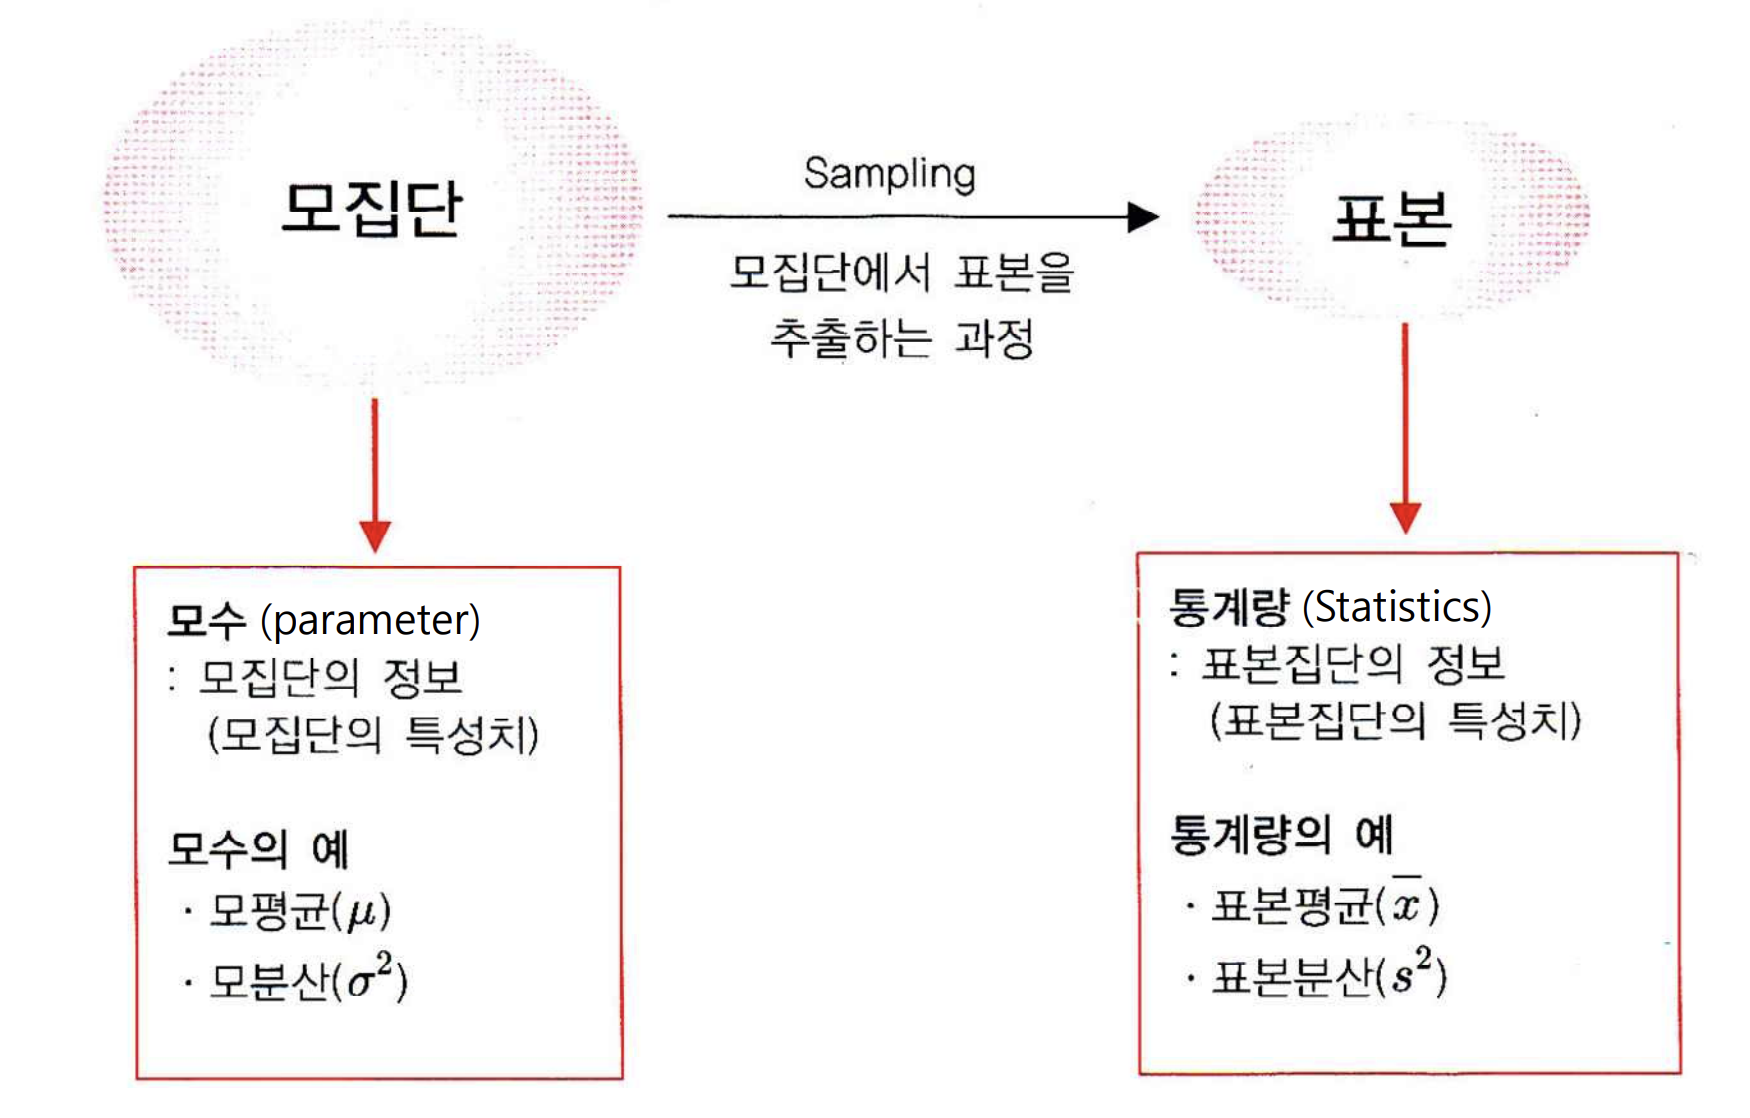

1. 등분산 테스트

등분산 검정에 대한 가설

    H0 : 모든 분산이 동일함

    H1 : 모든 분산이 동일하지 않음

    p-value < alpha, H0 기각

In [ ]:
stat, p_value = stats.levene(m, f)

In [ ]:
p_value

0.25871556908590615

In [ ]:
alpha

0.01

In [ ]:
if p_value < alpha :
    print('등분산을 가정할 수 없습니다. p-value : ', p_value)
else:
    print('등분산을 가정할 수 있습니다. p-value : ', p_value)

등분산을 가정할 수 있습니다. p-value :  0.25871556908590615


In [ ]:
result = stats.ttest_ind(m, f) #equal_var = False 로 설정

In [ ]:
alpha = 0.05 #1%, 5%

In [ ]:
p_value = result[1]

In [ ]:
p_value

0.9161940781163369

In [ ]:
if p_value < alpha :
    print('두 평균에 차이가 있습니다.')
else:
    print('두 평균에 차이가 없습니다.')

두 평균에 차이가 없습니다.


2. 정규성 검정

    H0 : 정규분포를 따른다.

    H1 : 정규분포를 따르지 않는다.

    p-value < alpha, H0 기각

In [ ]:
stats.shapiro(m)

ShapiroResult(statistic=0.842378556728363, pvalue=0.017529675737023354)

In [ ]:
stats.shapiro(f)

ShapiroResult(statistic=0.7487479448318481, pvalue=0.005243415478616953)

In [ ]:
x = stats.norm.rvs(loc=5, scale=3, size=600)

In [ ]:
shapiro_test = stats.shapiro(x)

In [ ]:
shapiro_test

ShapiroResult(statistic=0.9980581998825073, pvalue=0.7366688847541809)

3. 독립성 검정 : 카이제곱 검정 사용

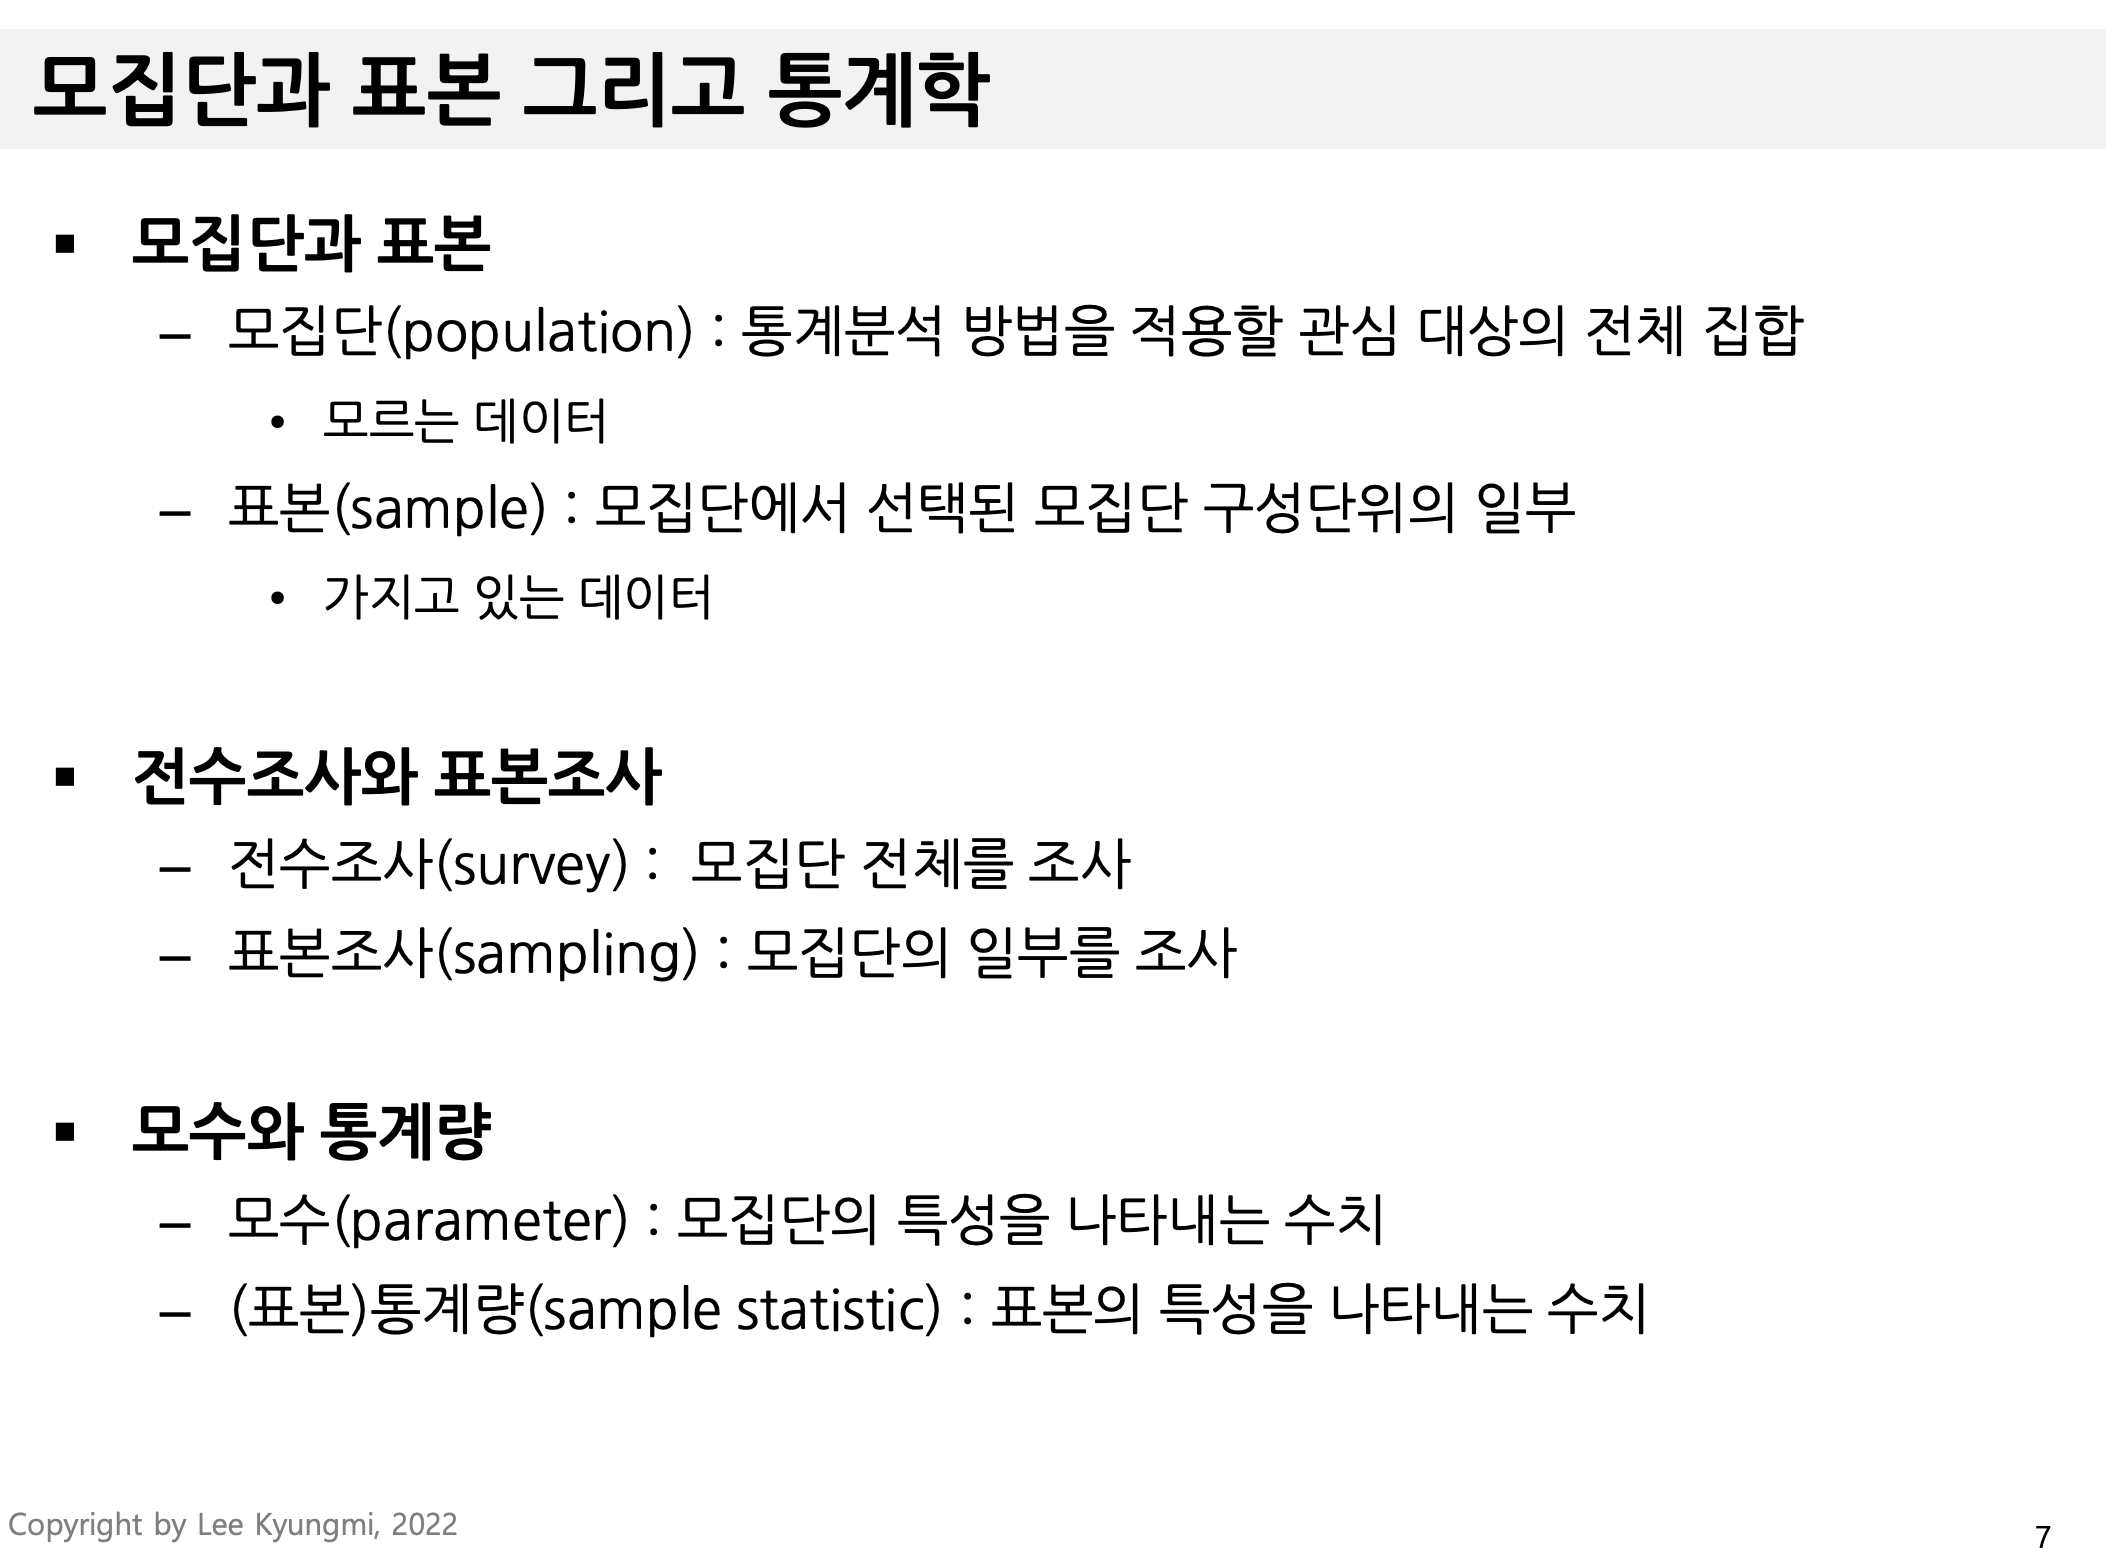

#편차 = $x_i - \bar x$

#분산 = $S^2 = {1 \over n} \sum_{i=1}^n (x_i - \bar x)^2$

#표준편차 = $\sqrt {s^2} = S = \sqrt {{1 \over n} \sum_{i=1}^n (x_i - \bar x)^2}$

#불편분산 = $s^2 = {1 \over n-1} \sum_{i=1}^n (x_i - \bar x)^2$

확률 변수 = 변수가 취할 수 있는 값과 그 값이 나오는 확률에 의해 정의 된다. (누구나 파이썬 통계분석, 115p)

X  : 확률 변수

x : 확률 변수 X 가 취할 수 있는 값 (주사위의 1,2, 3, 4, 5, 6)

P(X=x) : x 가 나올 확률

P(X=1) = 1/6

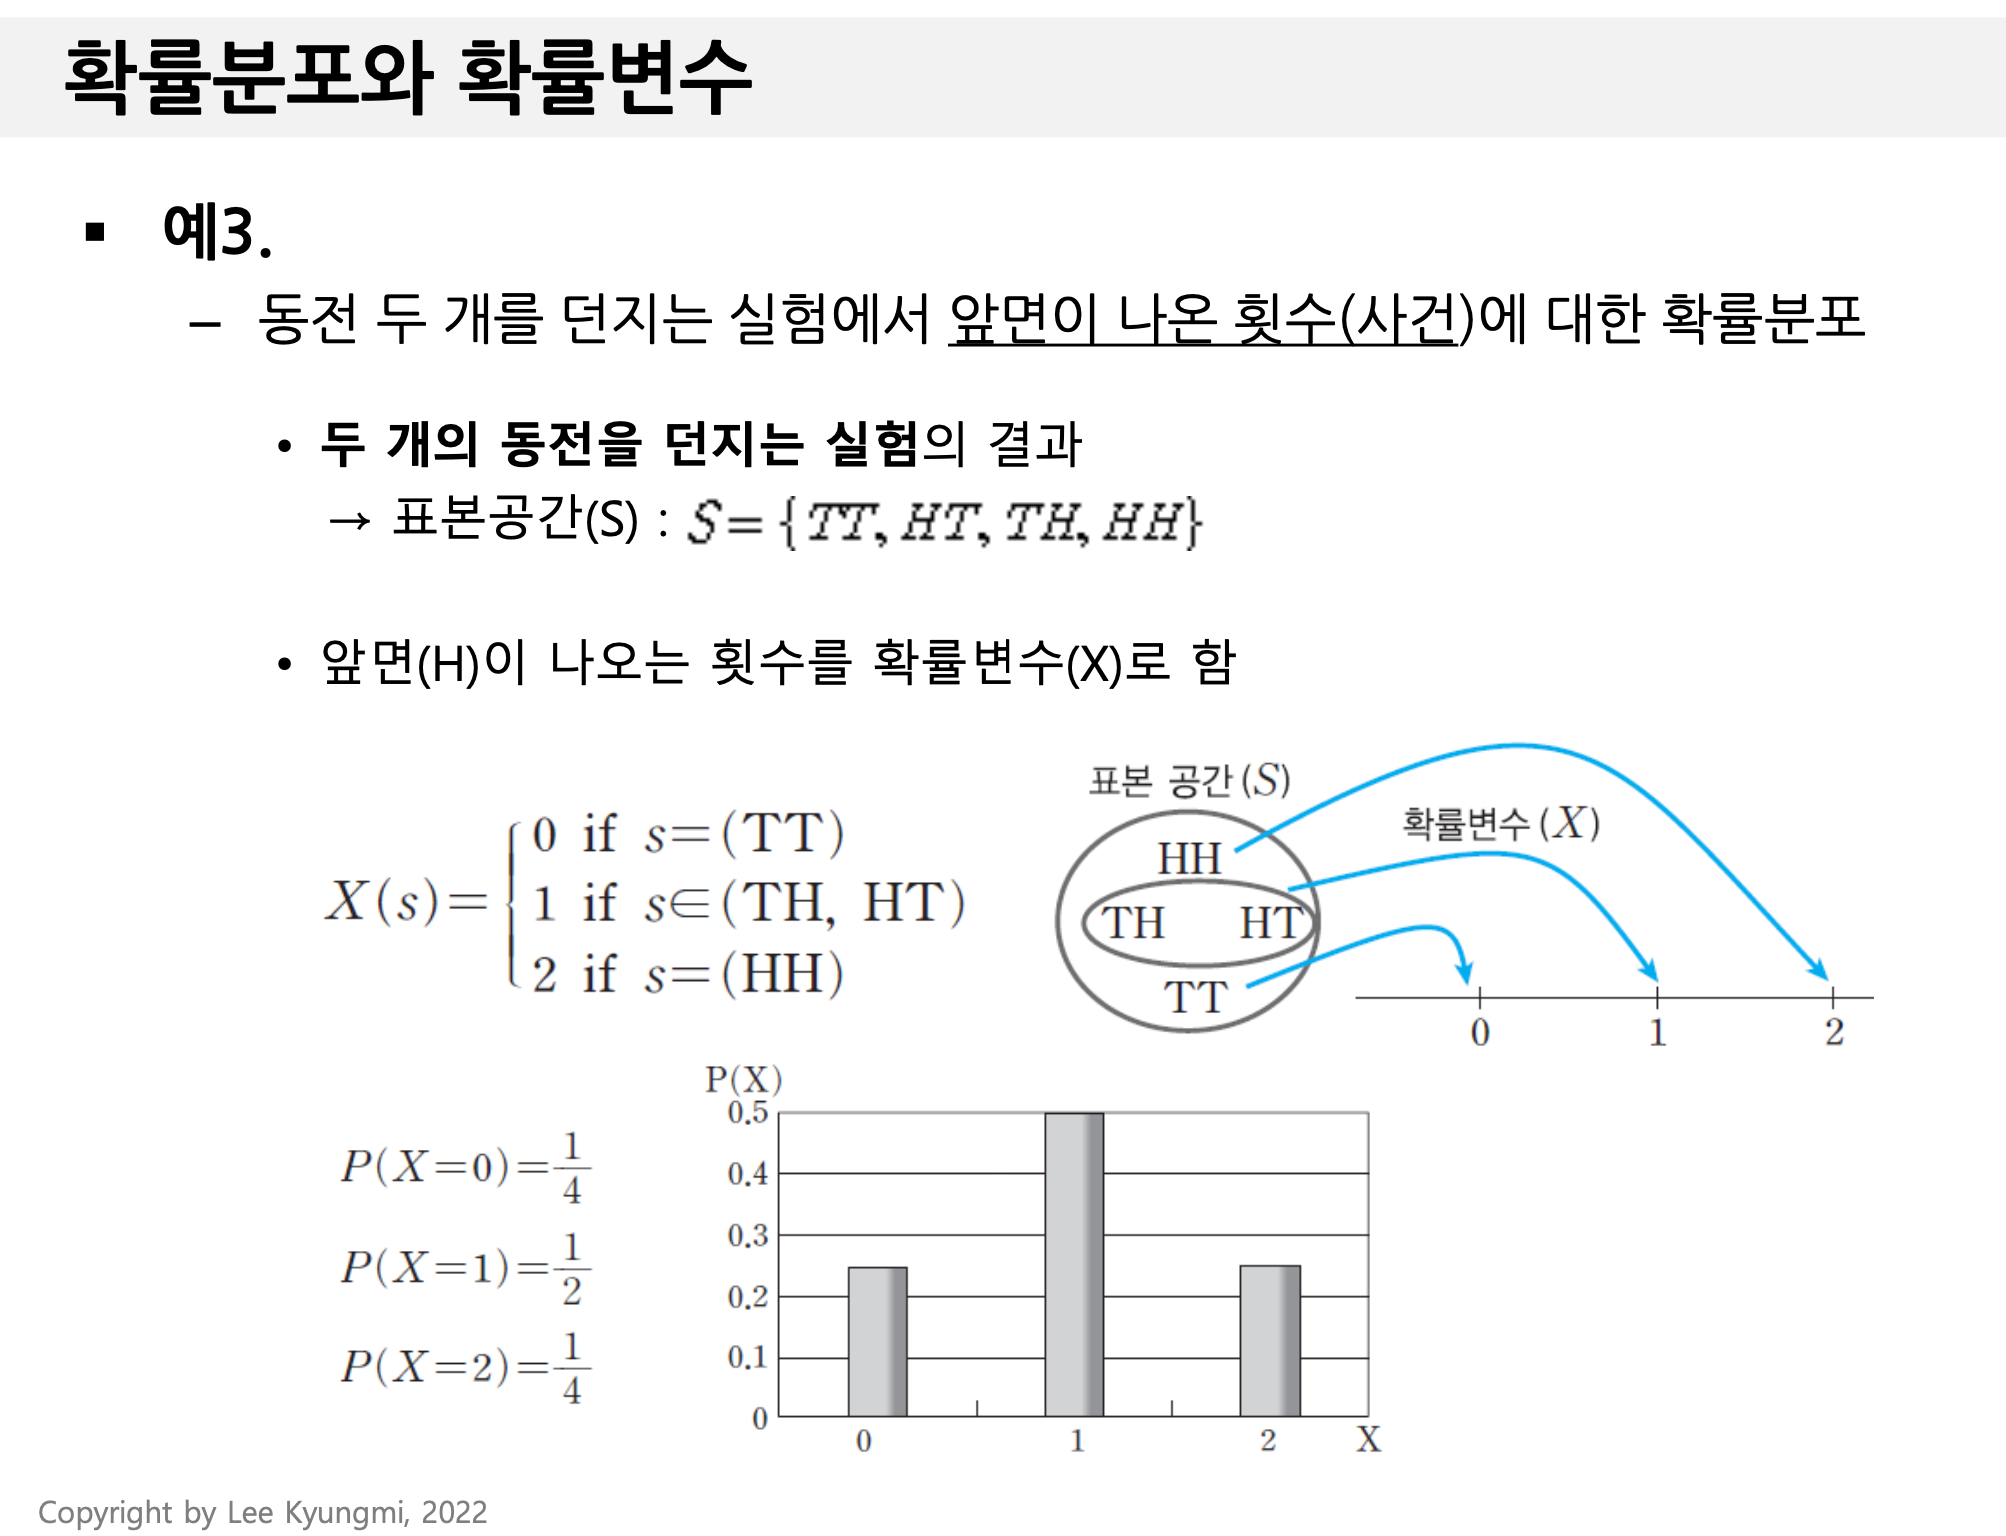

# 확률분포 : 확률변수가 취할 수 있는 값과 그 확률의 구체적인 대응 (위에 동일한 책, 115p)

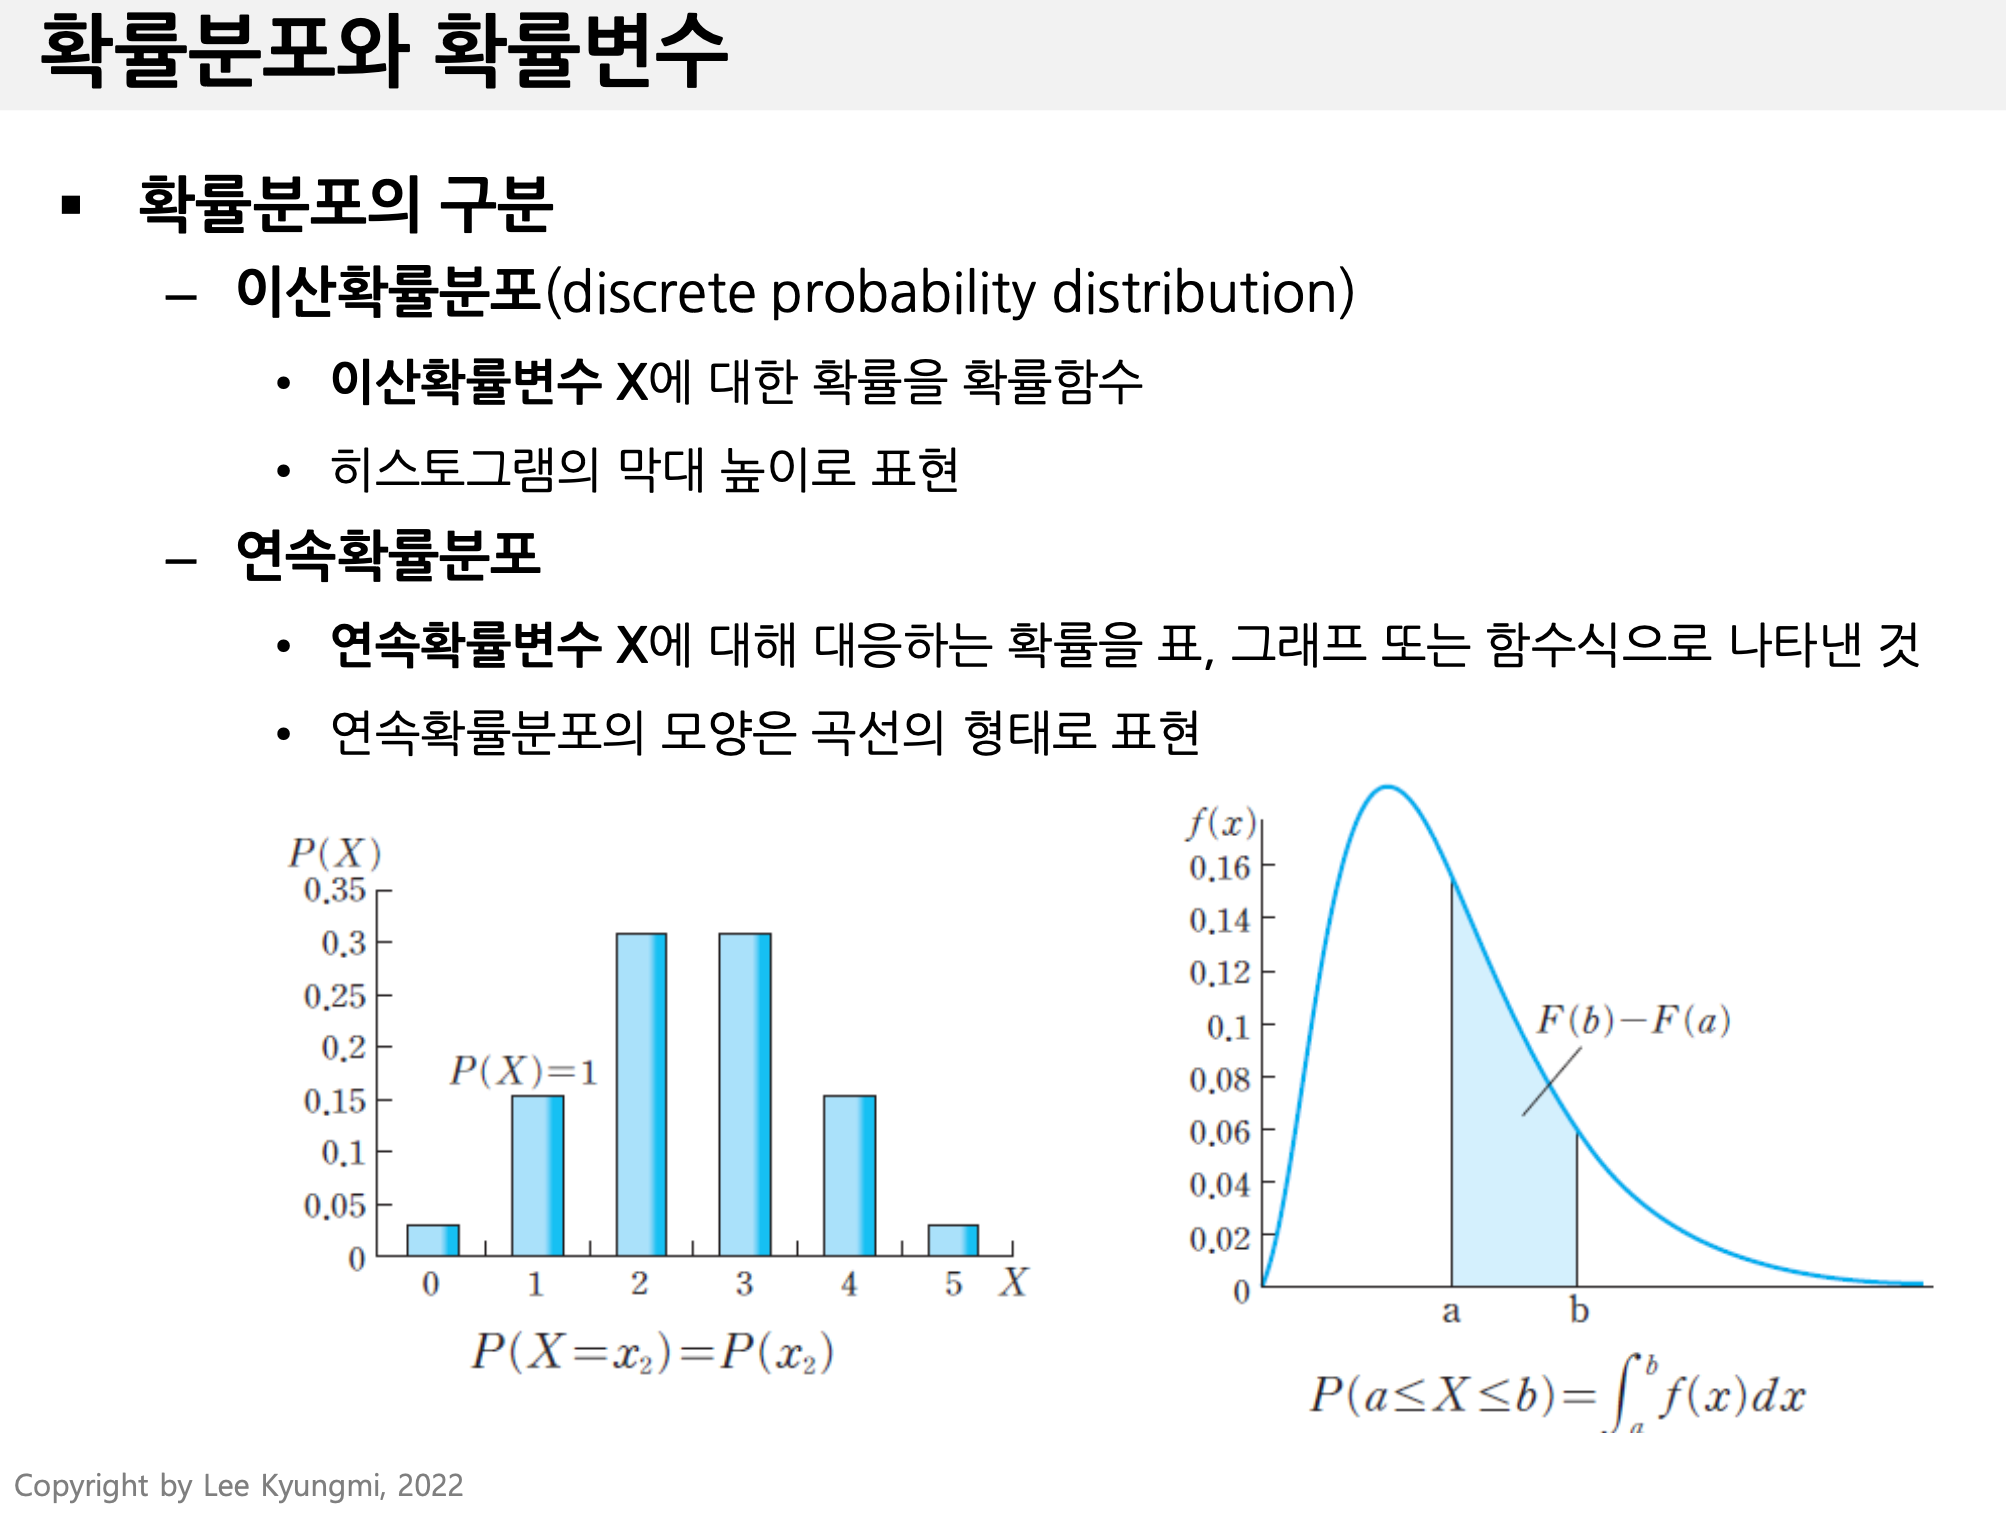

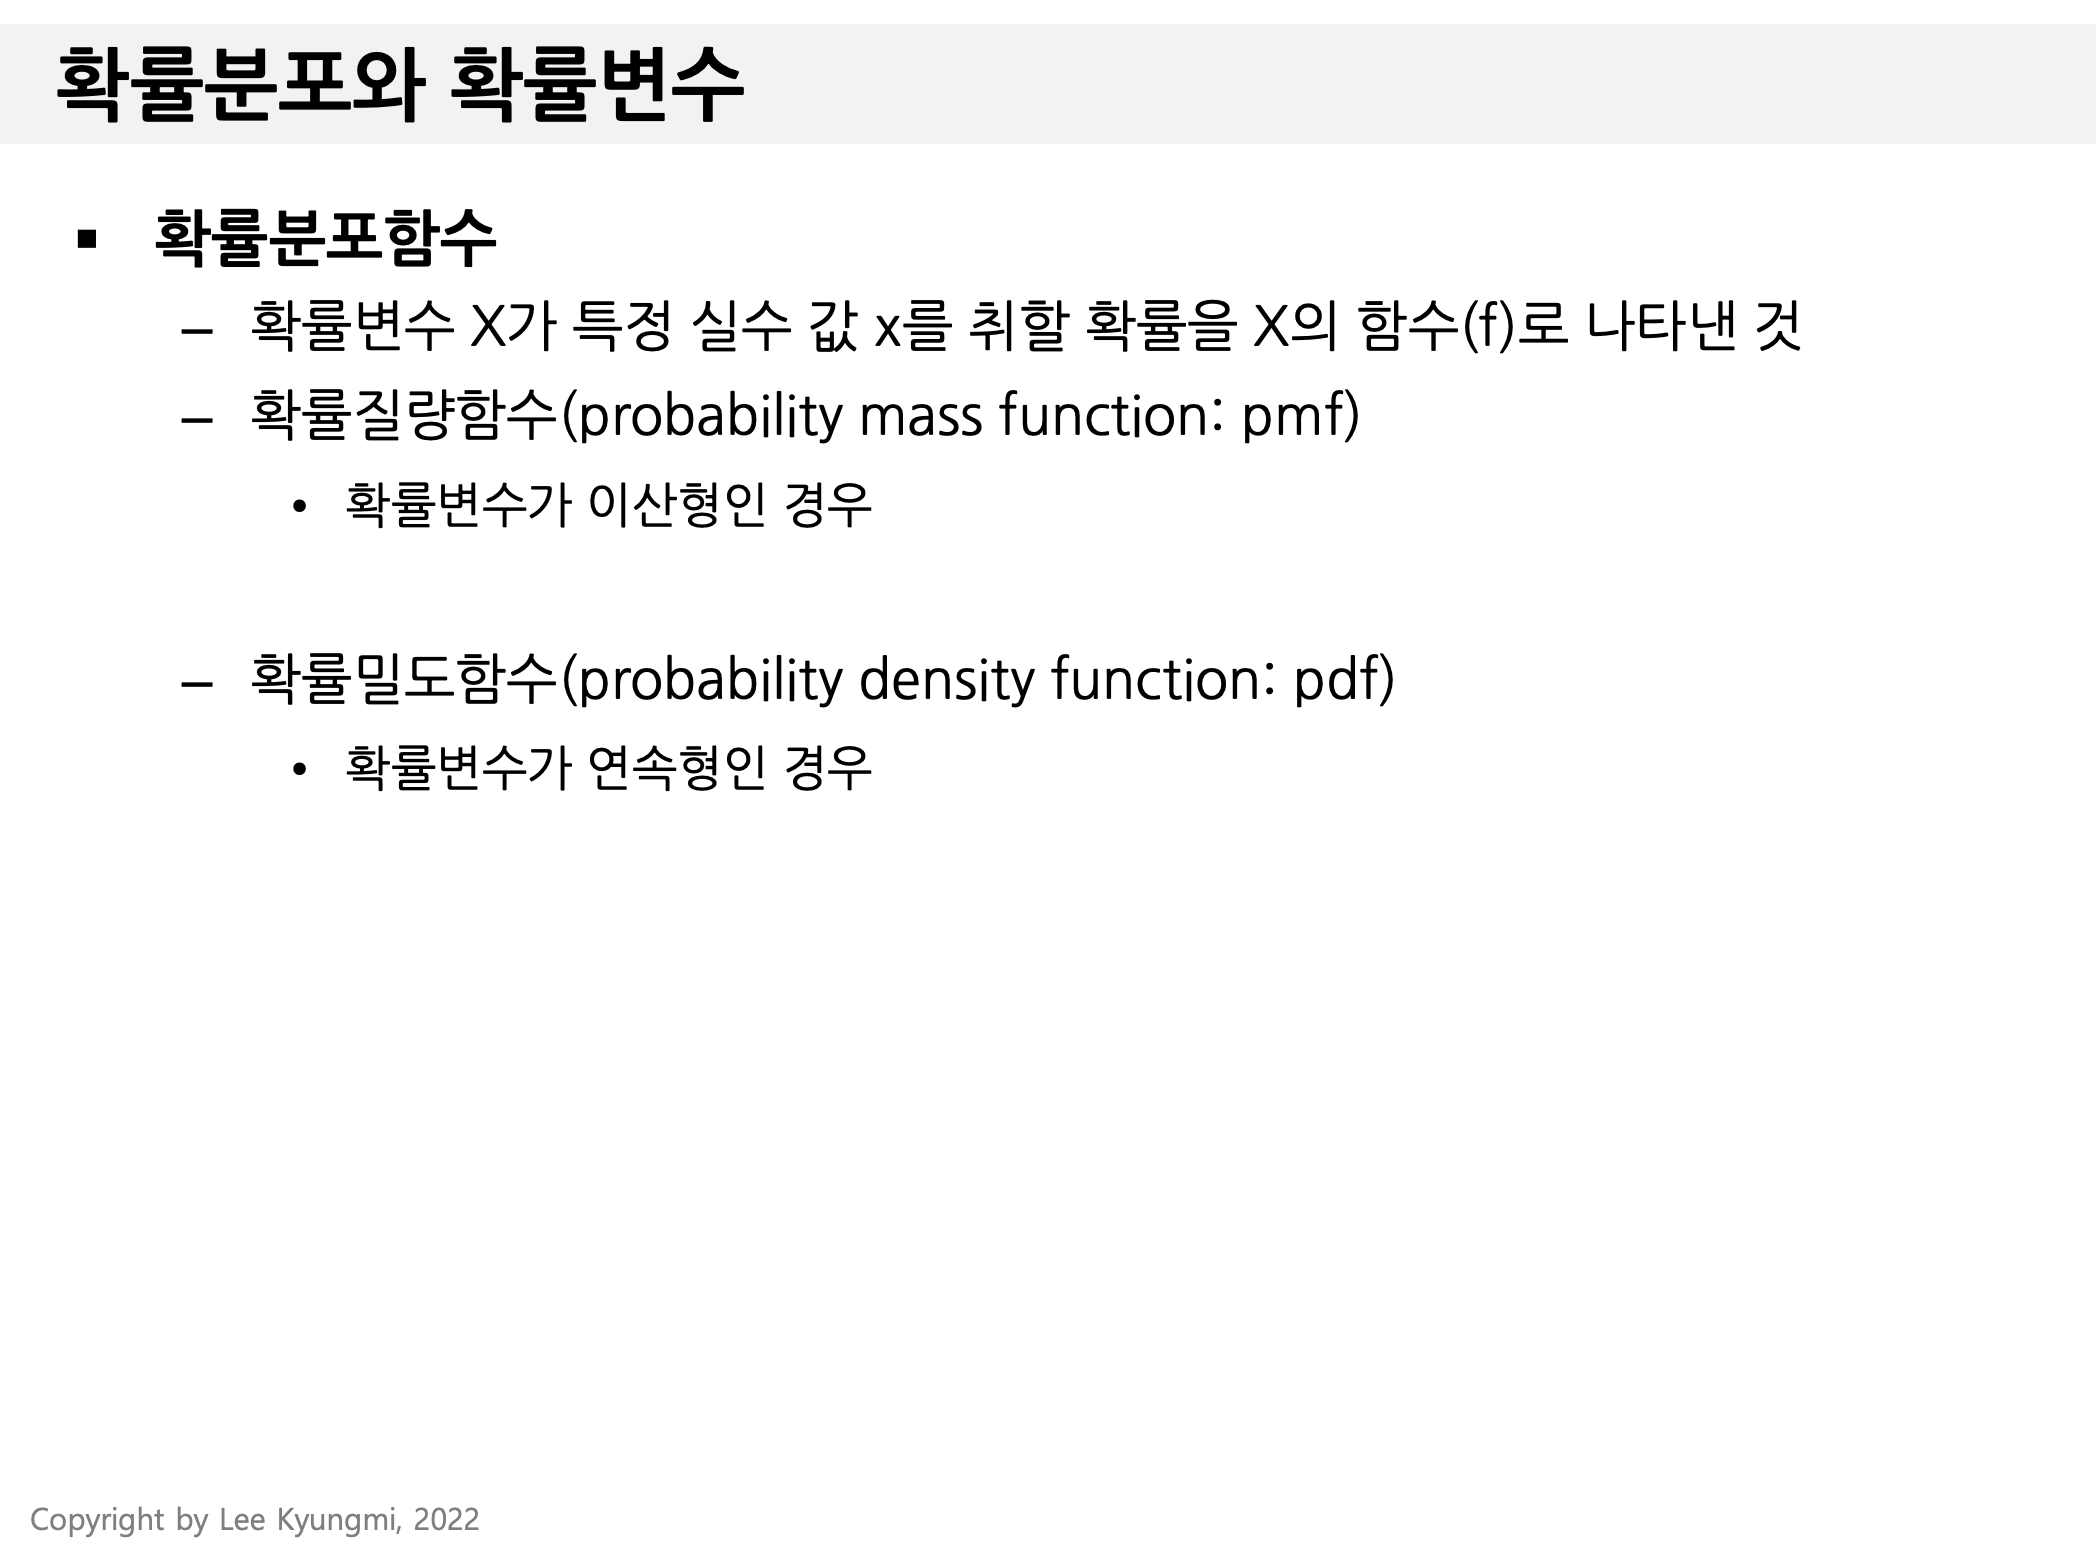

$\mu$ = 모평균

$\sigma$ = 모집단의 표준편차

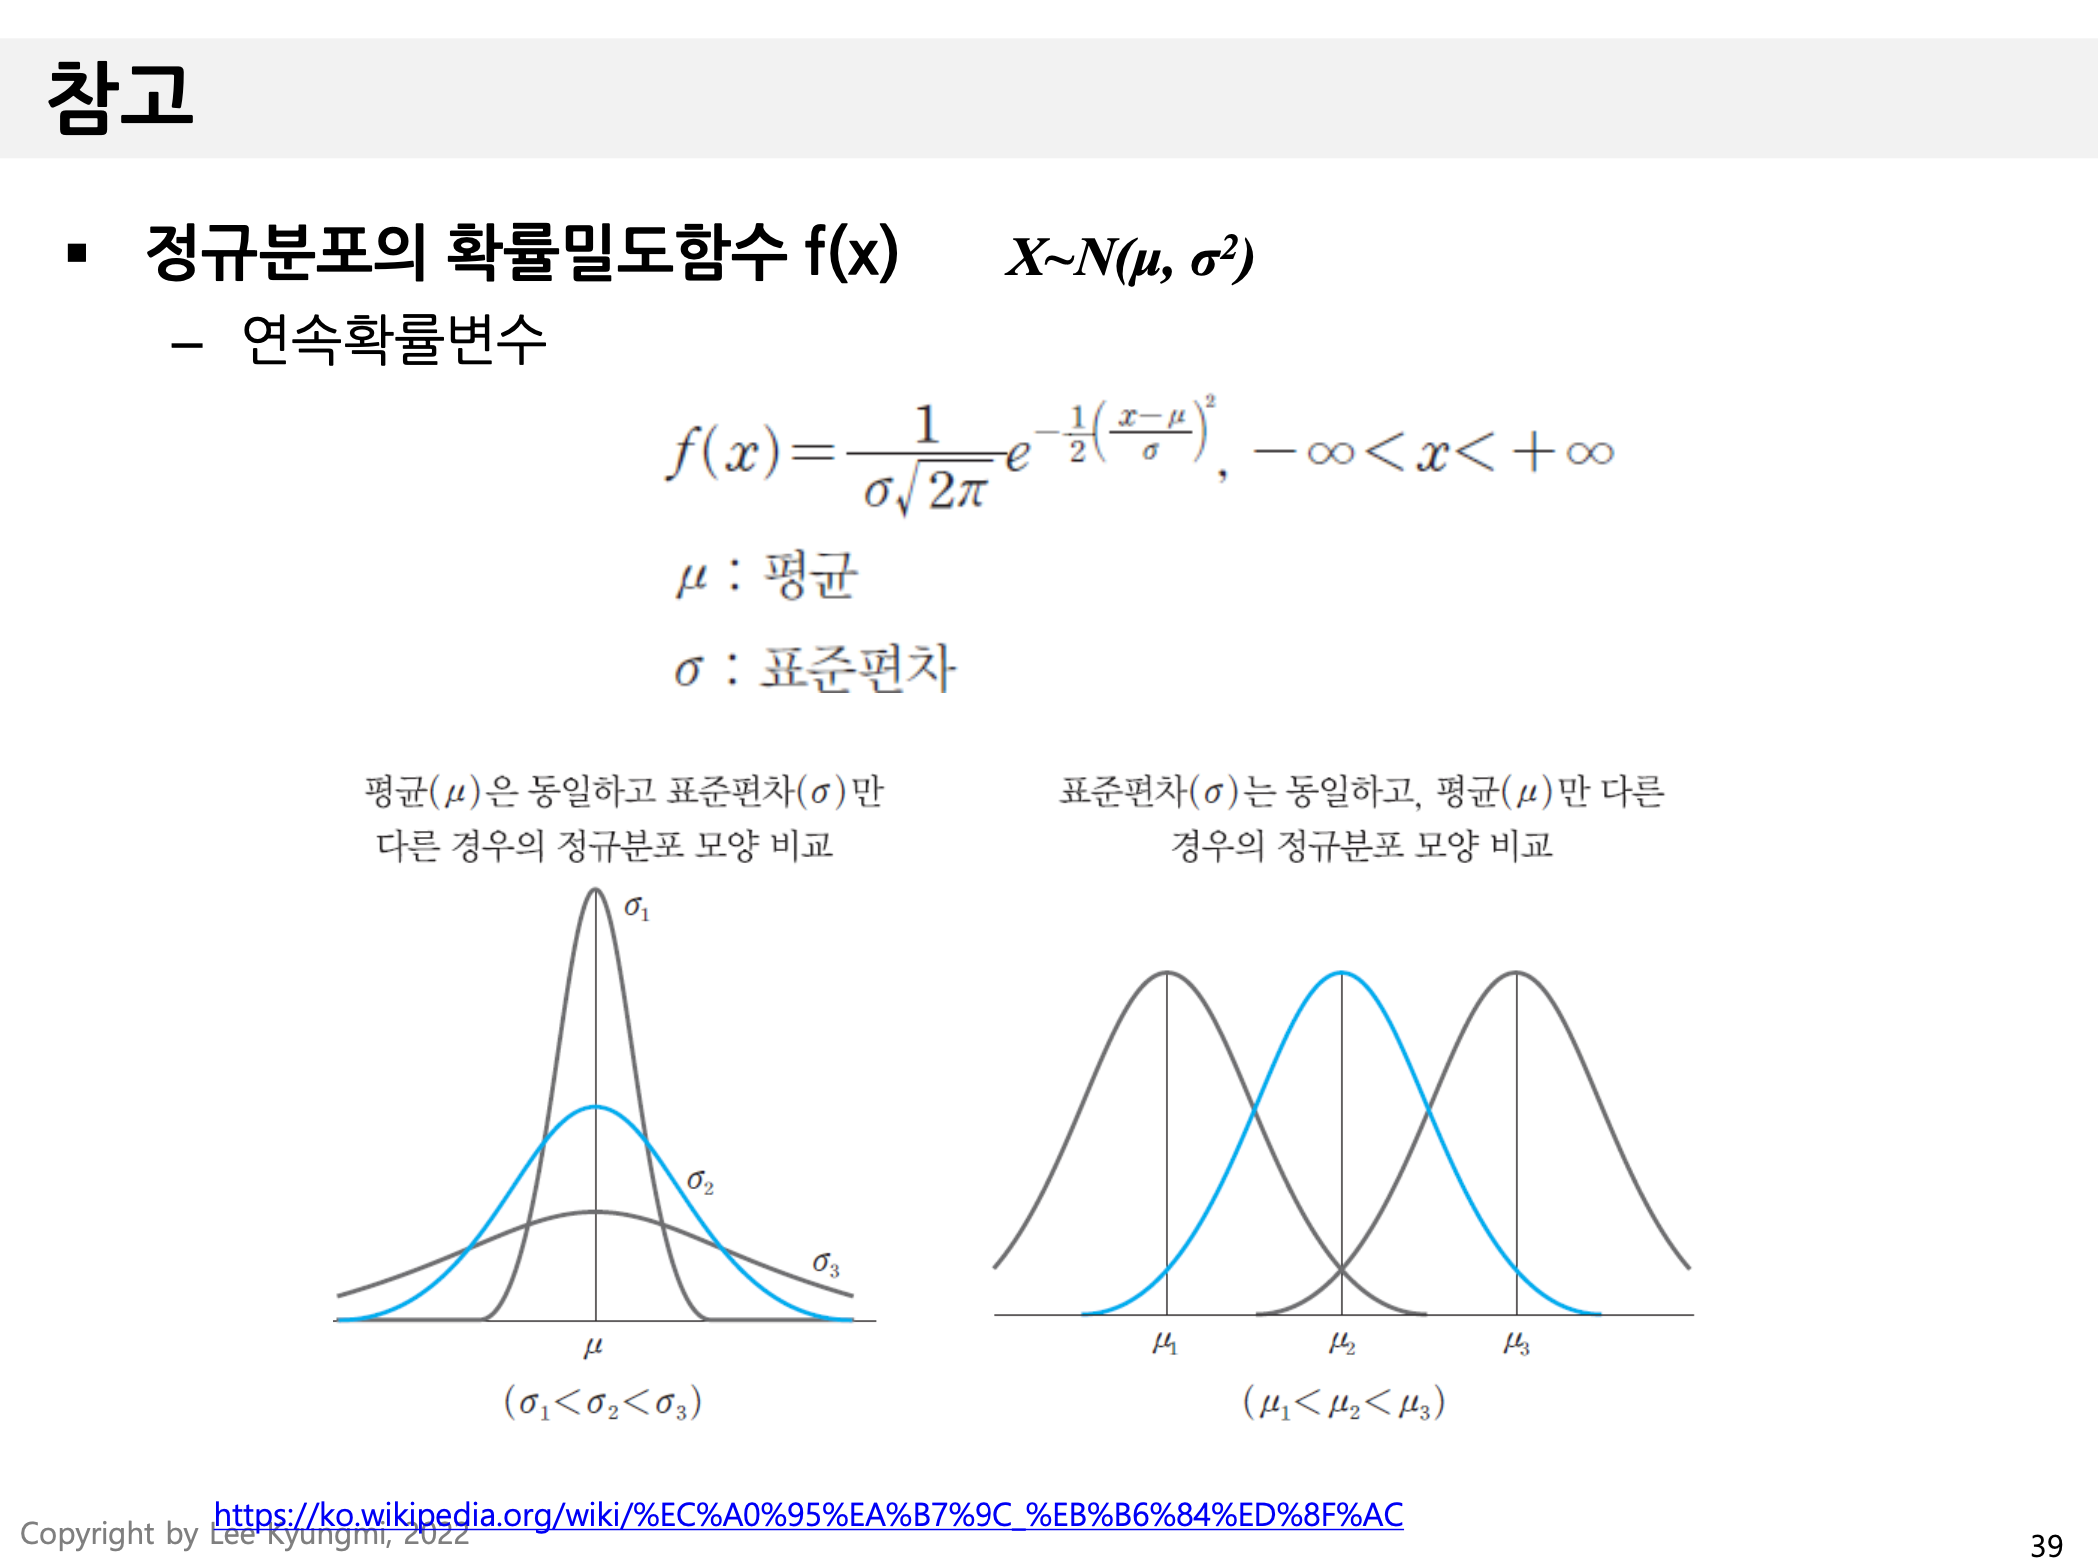

In [ ]:
rv = stats.norm(2, 0.5) # loc=2 : 평균, scale = 0.5 : 표준편차


$$ rv \ \sim \ N\ (2, 0.5^2) $$

In [ ]:
rv.mean()

2.0

In [ ]:
rv.var()

0.25

In [ ]:
x = np.arange(0, 4.1, 0.1)

In [ ]:
y = rv.pdf(x)

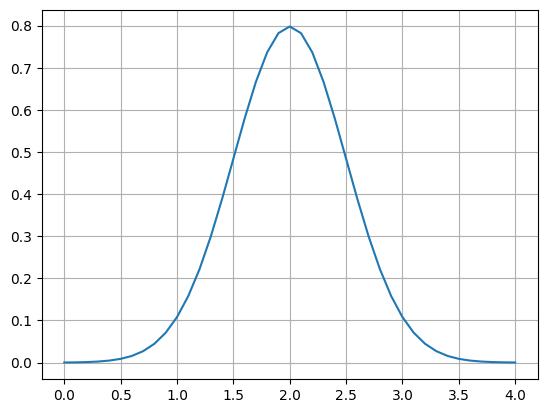

In [ ]:
plt.plot(x, y)
plt.grid()

In [ ]:
rv.cdf(2.0) #  확률을 구할 때 사용하는 method

0.5

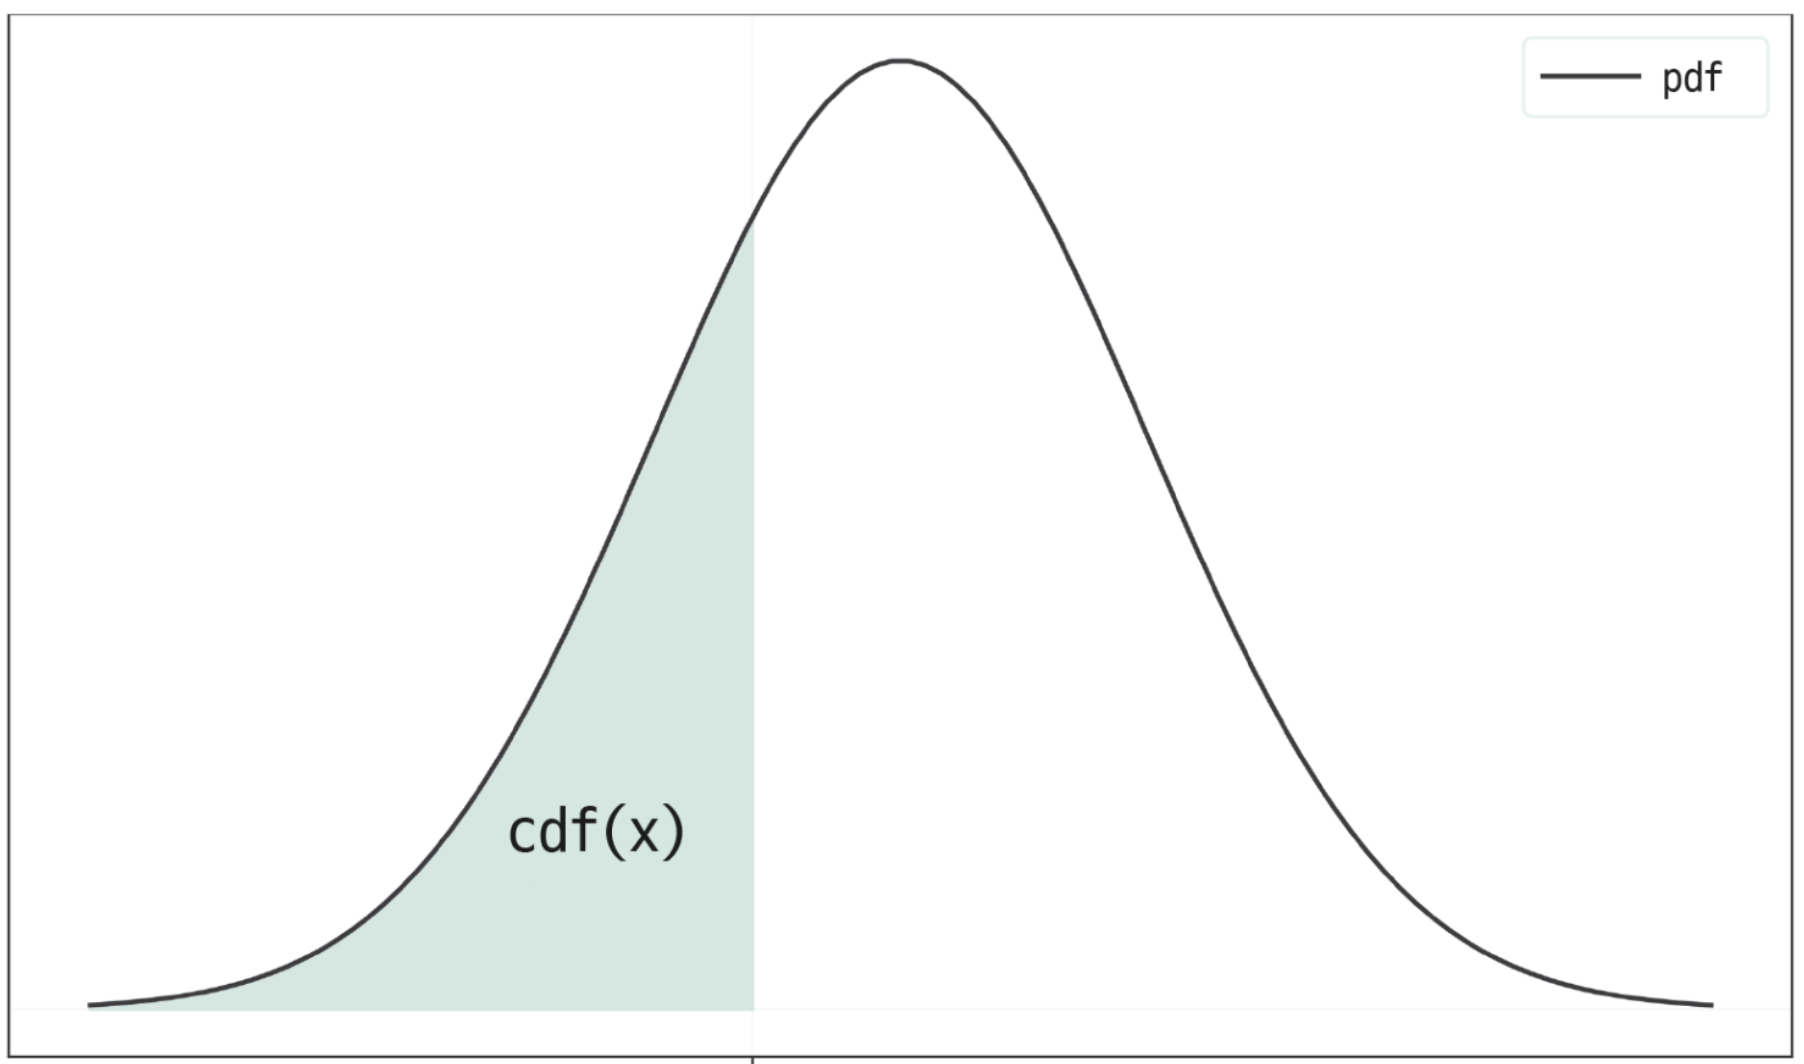

In [ ]:
rv.cdf(1.7)

0.27425311775007355

In [ ]:
rv.isf(0.3) # 결과 값은 X, 0.3(cdf 값)

2.2622002563540207

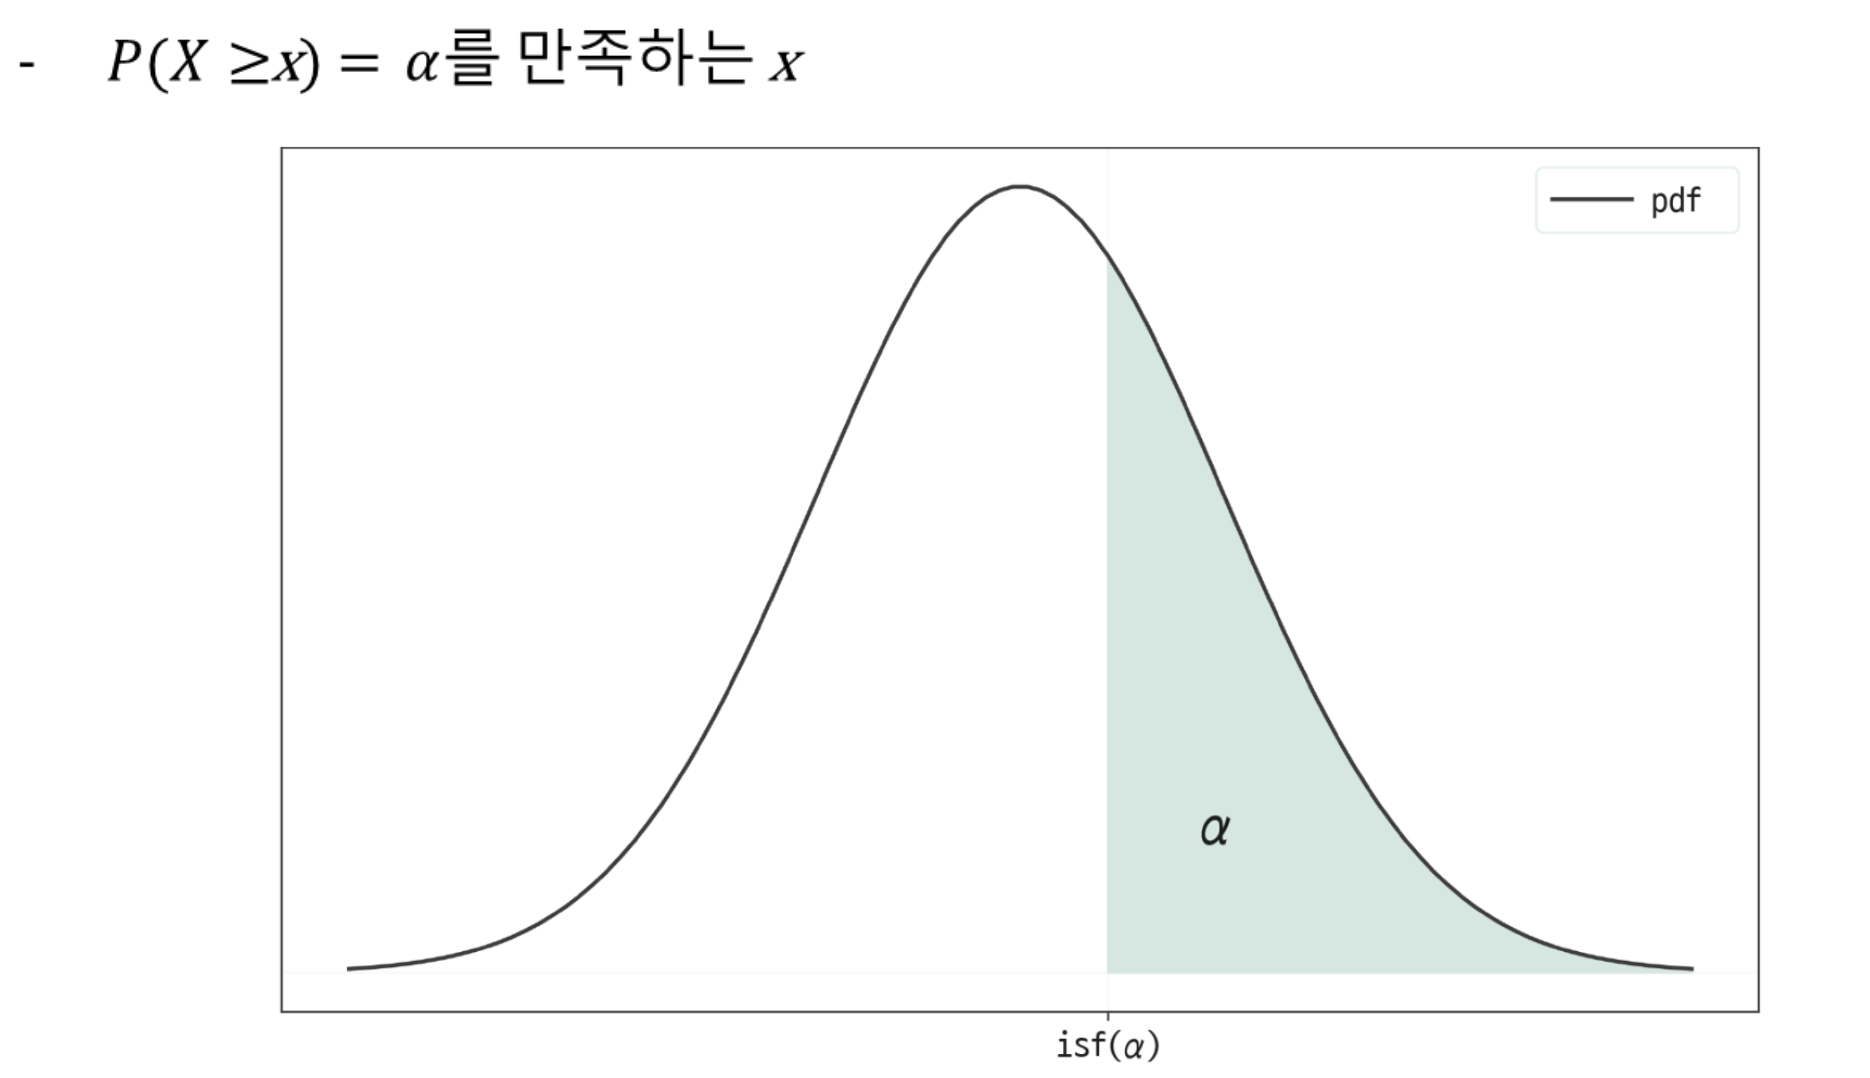

In [ ]:
rv.isf(0.5)

2.0

In [ ]:
rv.cdf(2.0)

0.5

alpha = 0.9 인 가운데 부분의 구간을 구해보자

구해지는 값 x


In [ ]:
rv.isf(0.95), rv.isf(0.05)

(1.1775731865242638, 2.8224268134757367)

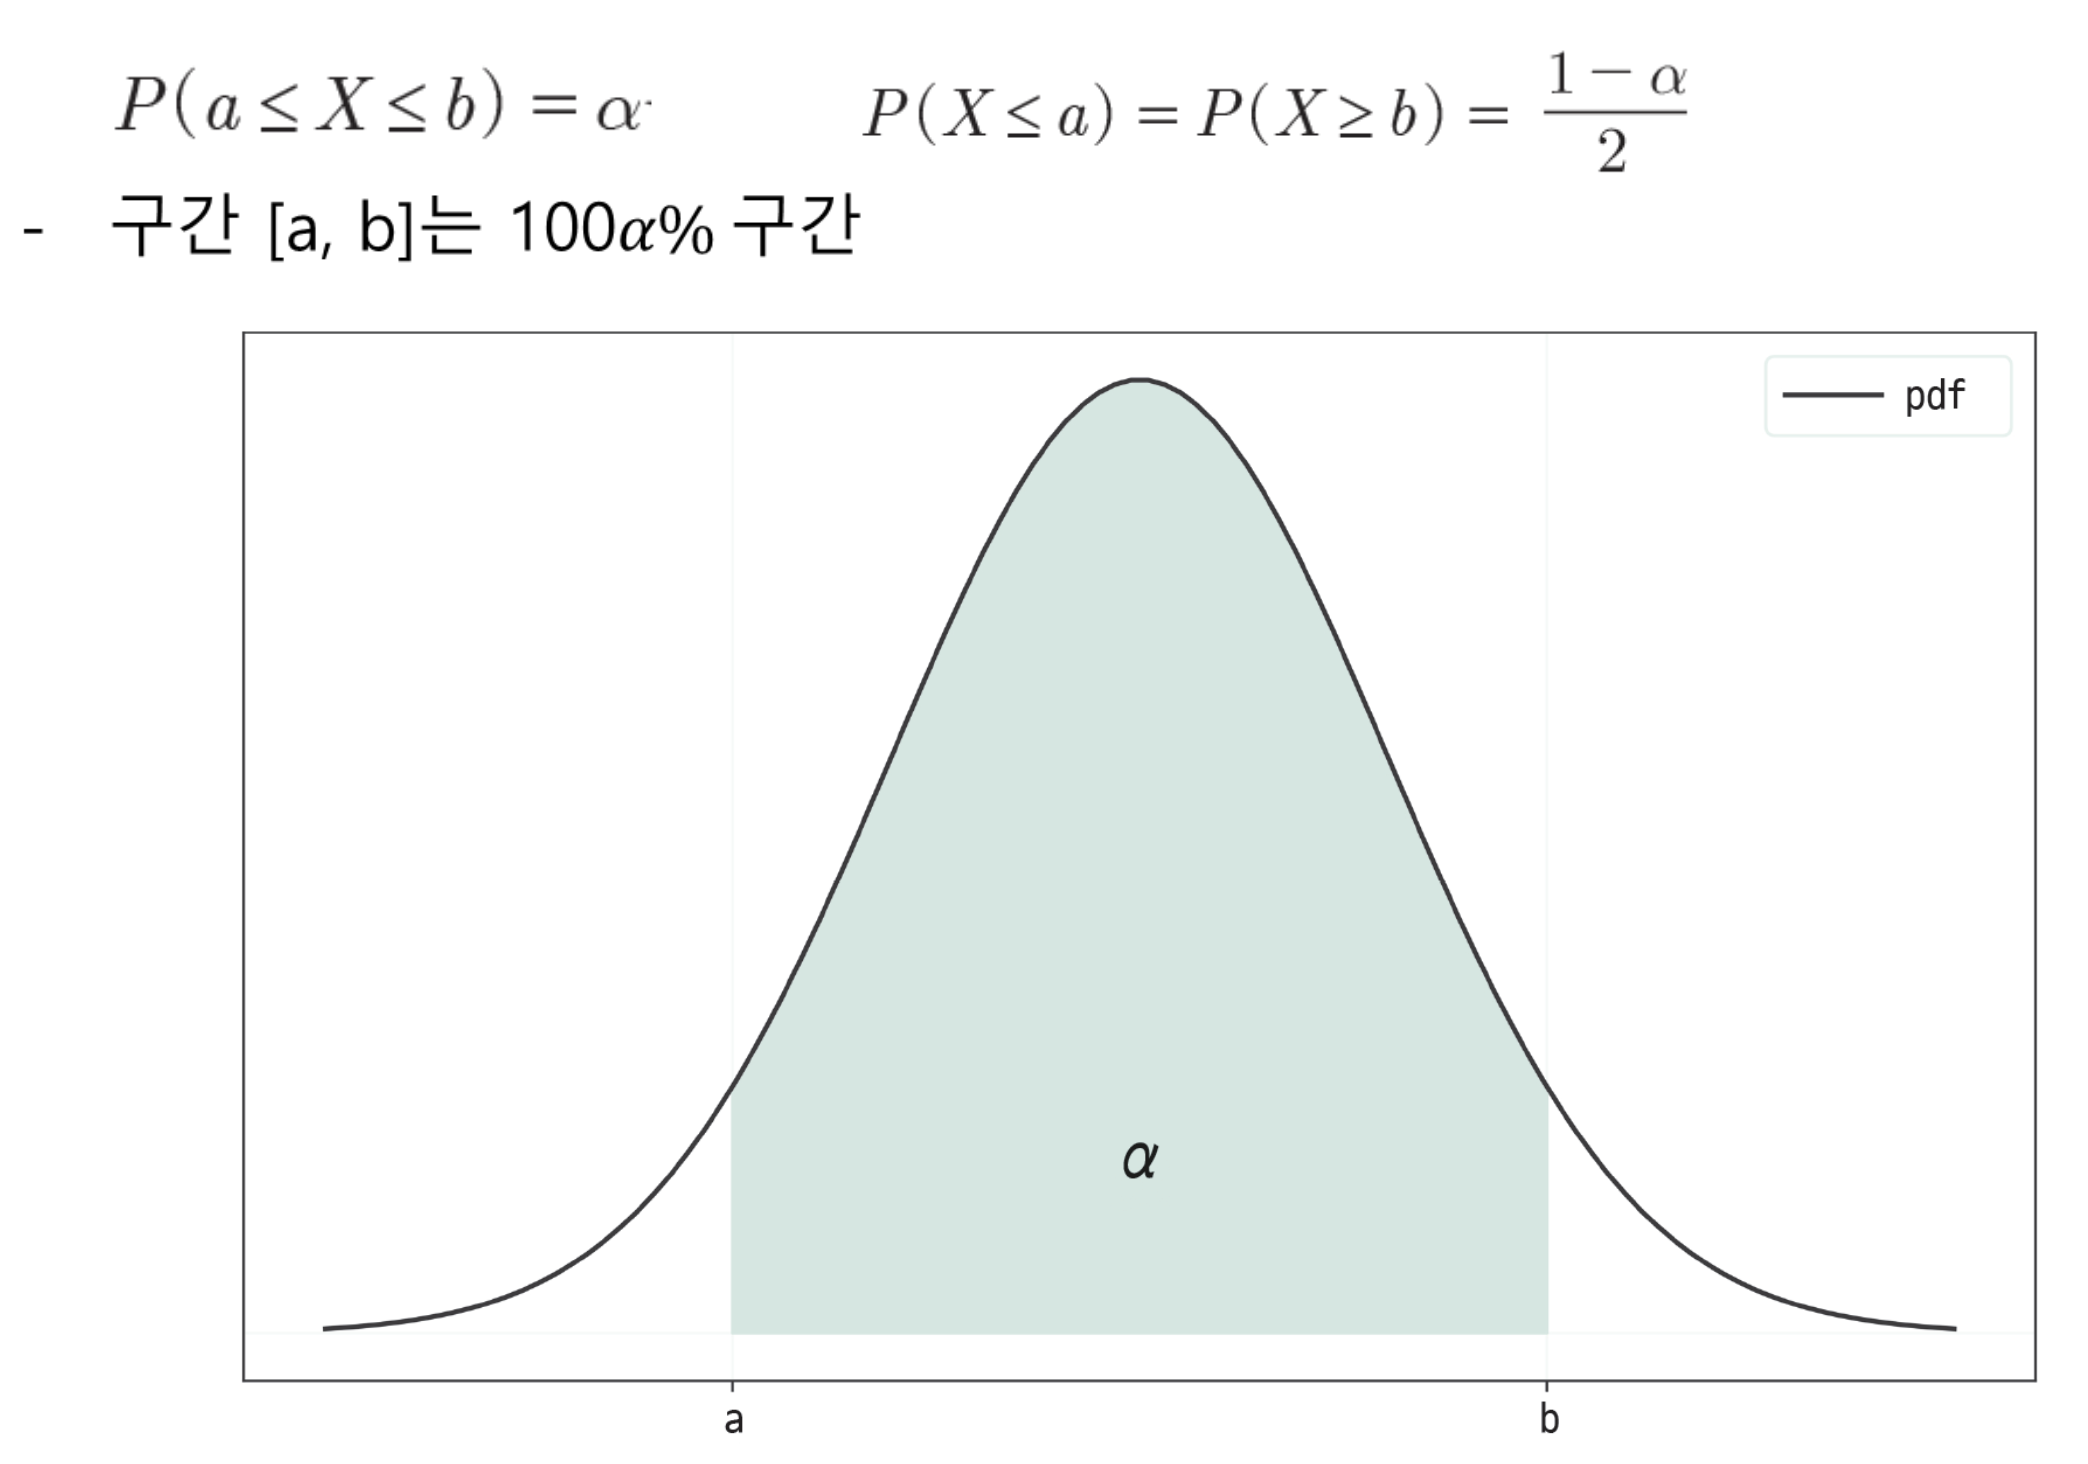

In [ ]:
rv.interval(0.9)

(1.1775731865242636, 2.822426813475736)

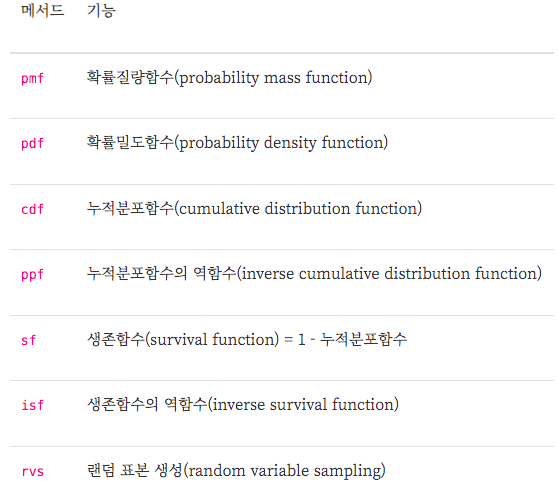

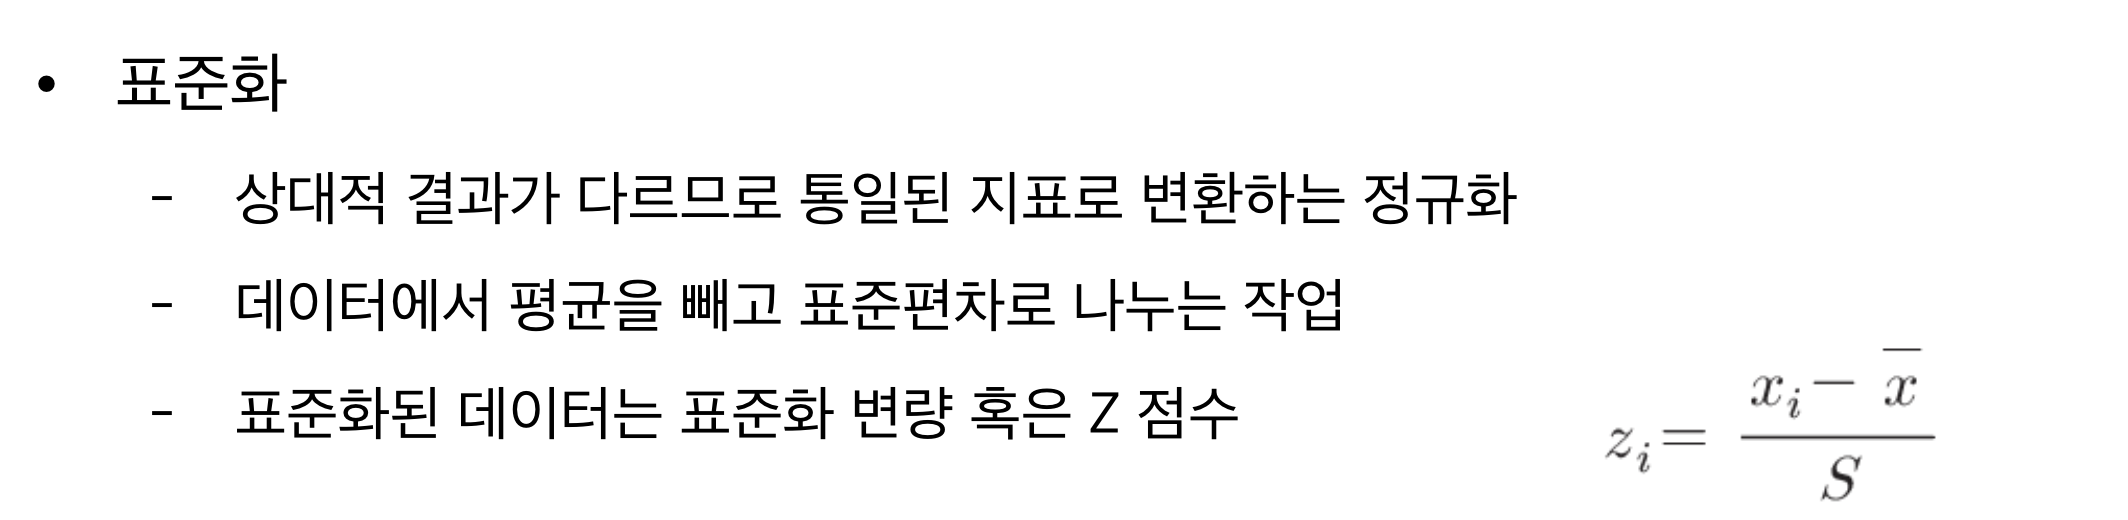

X가 확률 변수 였기 때문에 X 의 정규화 값인 Z 도 확률 변수이다.

변환된 확률변수도 확률변수가 된다.(누구나 파이썬 통계분석, 한빛아카데미, 권기태 옮김, 121 page)

#표본평균의 기댓값과 분산

$$ E(\bar {X}) = \mu$$

$$V(\bar X) = {\sigma^2 \over n}$$

기대값 = 값*확률의 총합

x = [10, 10, 1, 3]

(10+10+1+3) / 4 = 6

10 * 2/4 + 1 * 1/4 + 3 * 1/4 = 5 + 0.25 + 0.75 = 6

## 통계적 가설검정이란

가설 검정 : 표본분포를 이용하여 모집단 특성(모수)에 대한 가설의 진위를 가리는 것

모집단의 모수에 관하여 두 가지 가설을 세우고, 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판결하는 것

가설 검정의 상황

과자 봉지의 무게가 130 g 이라 명시되어 있는데, 실제로 측정해보니, 135 가 나오거나, 125가 나온다.

모평균 : 130

모분산 : 9

표본 개수 : 14  

유의 수준 : 0.05를 생각할때

표본 평균 값 $\bar X$ : 과자 14봉지의 평균값이 125 라면, $\bar X = 125$ 가 된다.

#이 때, 표본 평균 $\bar X$가 $P (\bar X \le x) = 0.05$ 인 x를 찾아 보자


여기서, $P (\bar X \le x) = 0.05$ 는 표본 평균값 $\bar X$ 가 x 값보다 작거나 같을 확률이 0.05 이다 라는 것을 의미 한다.

$$X \sim  N(130, 9)$$

$$\bar X \sim  N(130, 9/14)$$

In [ ]:
rv = stats.norm(130, np.sqrt(9/14)) # loc=2 : 평균, scale = np.sqrt(9/14) : 표준편차

In [ ]:
rv.isf(0.95)

128.68118313069039

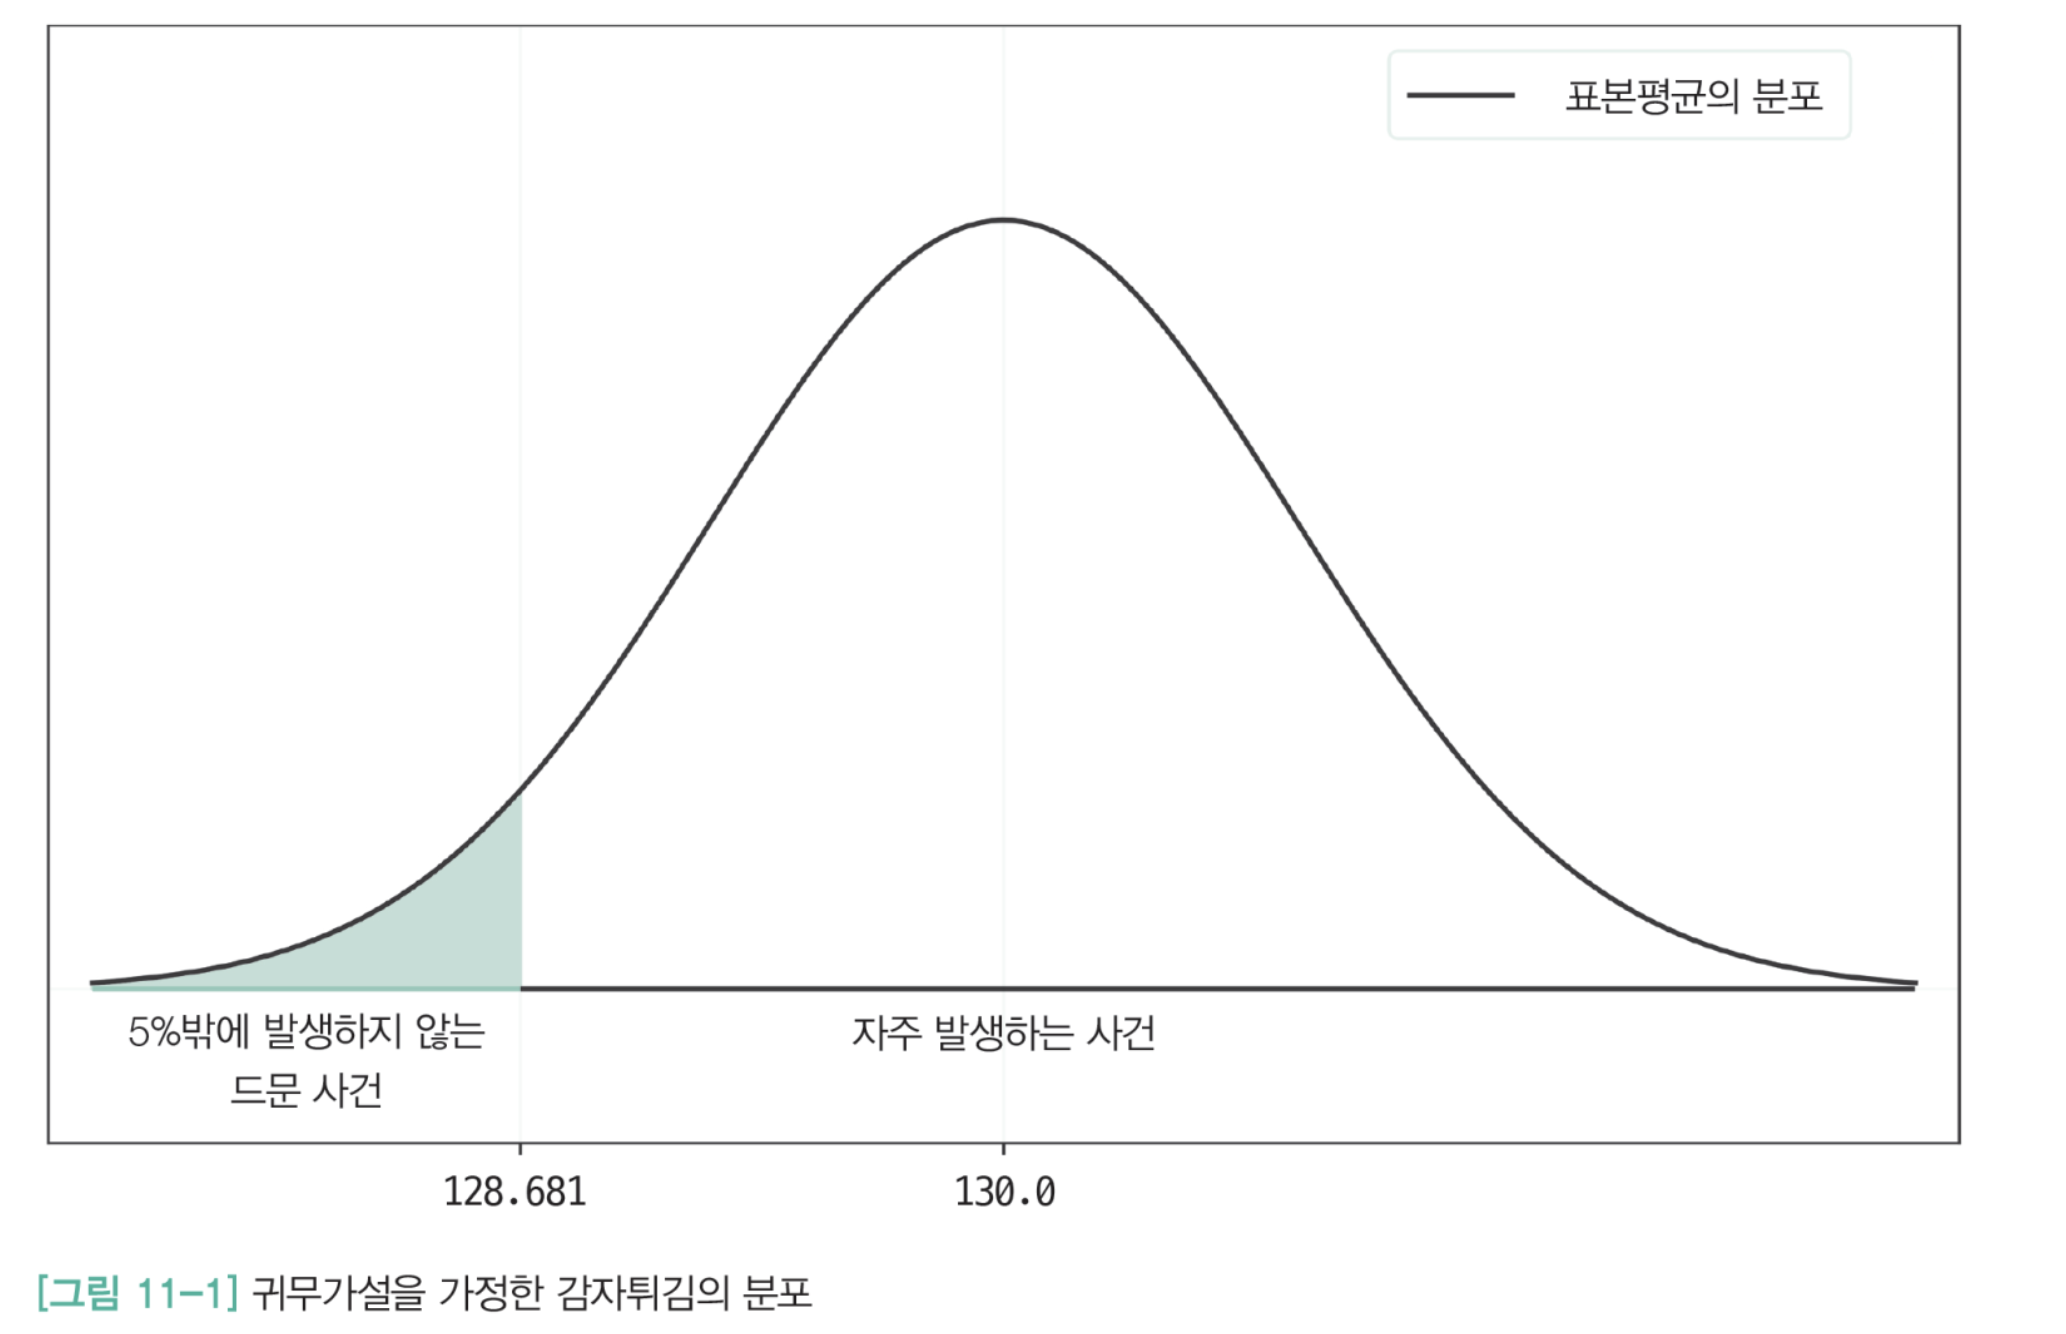

과자 봉지의 무게를 재었더니 128.45g 가 나왔다.

기준이 잘못되었다.

-> 모평균 130보다 작아.

--> 통계적으로 해결해보자




가설 : 모평균이 130보다 작다

이 가설을 통계로 검증하자

대립 가설 : 모평균은 130보다 작다.

귀무 가설 : 모평균은 130이다.

결과 : 귀무가설 기각 / 채택

기각 -> 귀무가설이 틀렸다.

채택 -> 귀무가설이 옳은지 여부를 알수 없다. 보류


귀무가설의 기각/채택 여부를 판단 하는일 == 검정

상기 그래프는 귀무가설을 따르는 그래프다.

귀무가설에 의하면, 128.681 이 나올 확률은 5% 다

즉 이말은 귀무 가설이 맞는데도 불구하고 귀무가설을 기각해서 오류가 발생할 확률의 최대값이 5% 다

# 제 1종 오류 = 귀무 가설이 옳은데도, 귀무 가설을 기각해서 발생하는 오류

# 제 1종 오류를 범할 확률의 최대 허용 한계 == 유의수준 == $\alpha$ (수리통계학, 김우철, 민영사, 299p)

무게 평균값이 128.45 가 나와서 귀무가설에 따라 발생할 확률을 계산해 보니 3% 가 나왔다.

3 % < 5 %

# P-value = 주어진 검정통계량의 귀무가설에 의한 확률값

이 경우의 검정 통계량 = 표본평균

또한,

## 표본 평균 124g은 임계값 128.681 보다 작은 값이므로, 귀무 가설은 기각 된다.
## 표본 평균 129g은 임계값 128.681 보다 큰 값이므로, 귀무 가설은 채택 된다.

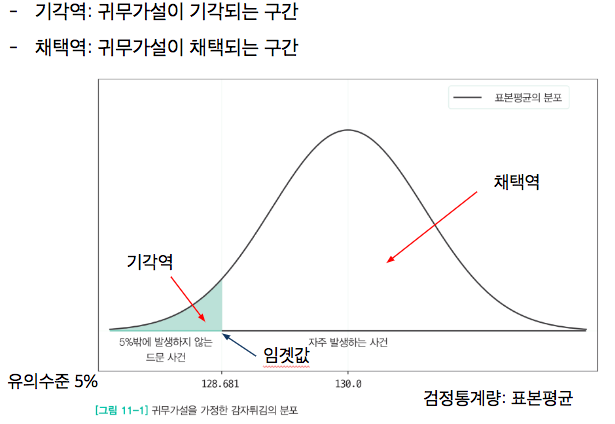

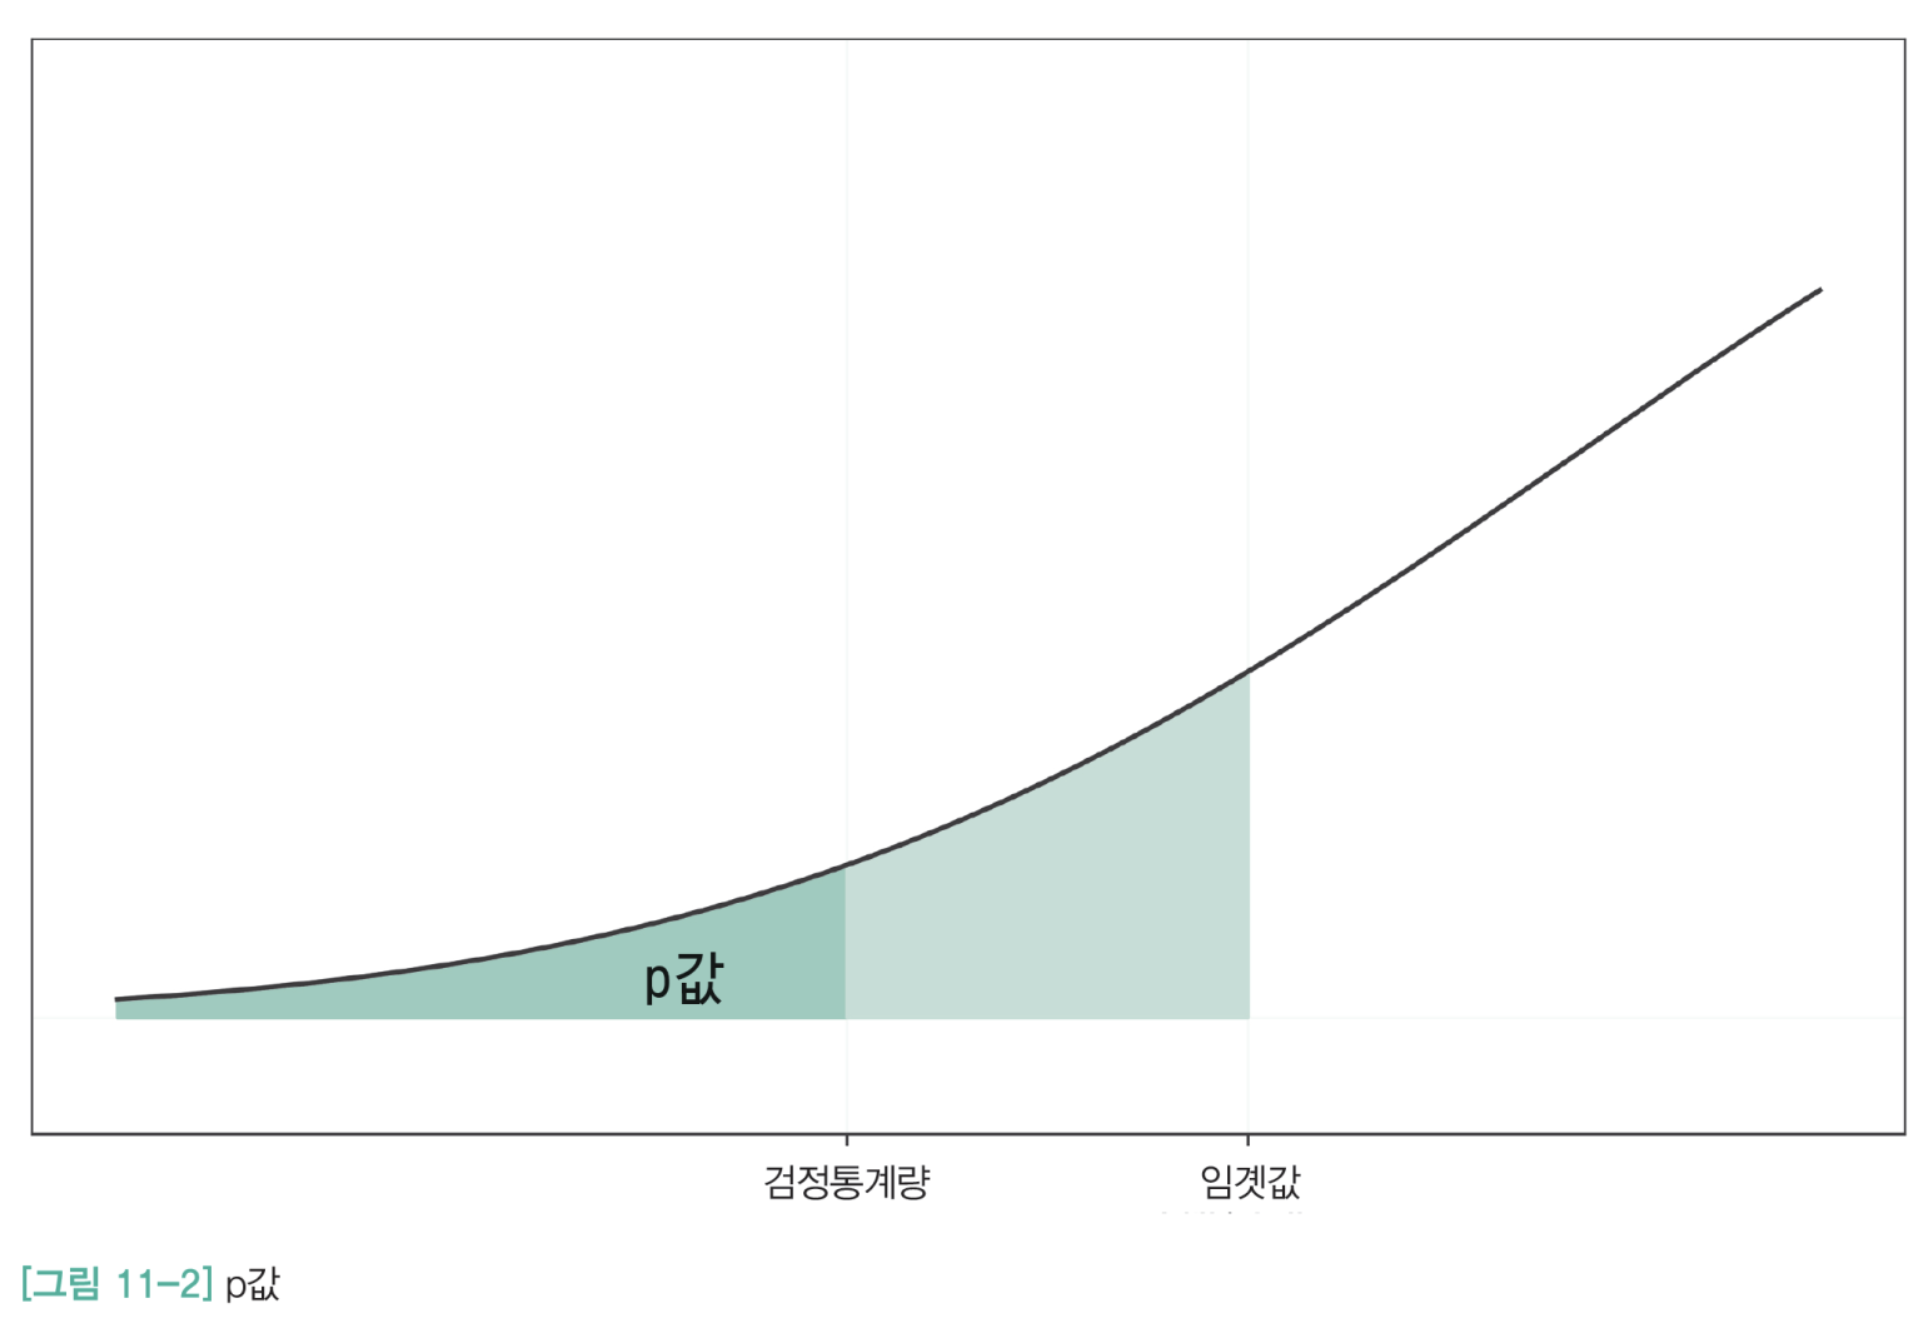

# 귀무 가설의 기각 조건

    1. P-value < 유의수준

    2. 검정 통계량 < 임계값

## 이제 표본평균 $\bar X$ 이 아닌 일반화 한 값으로 고쳐보자 -> 표준화

In [ ]:
sample = np.array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [ ]:
s_mean = np.mean(sample)

In [ ]:
s_mean

128.4507142857143

In [ ]:
z = (s_mean-130)/np.sqrt(9/14) # 검정통계량 : Z

In [ ]:
z

-1.932298779026813

In [ ]:
rv = stats.norm()

In [ ]:
rv.isf(0.95) # 임계값

-1.6448536269514722

In [ ]:
rv.cdf(z)

0.026661319523126635

모평균, 모분산 을 알고 있는 경우

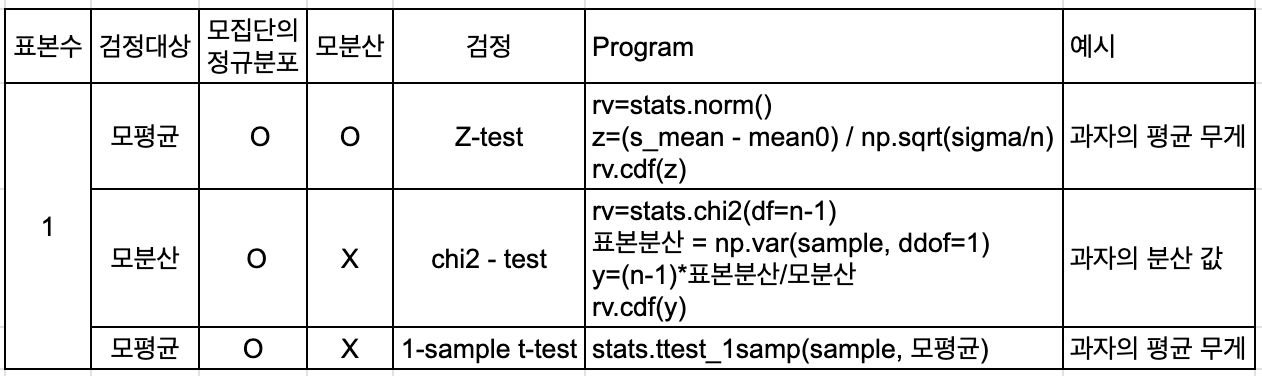

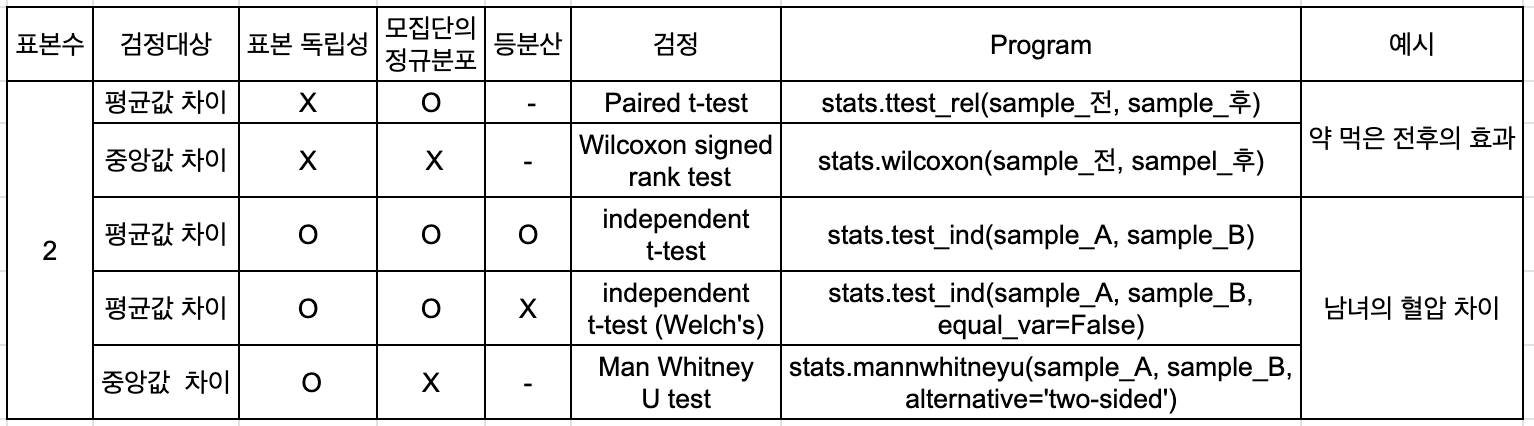

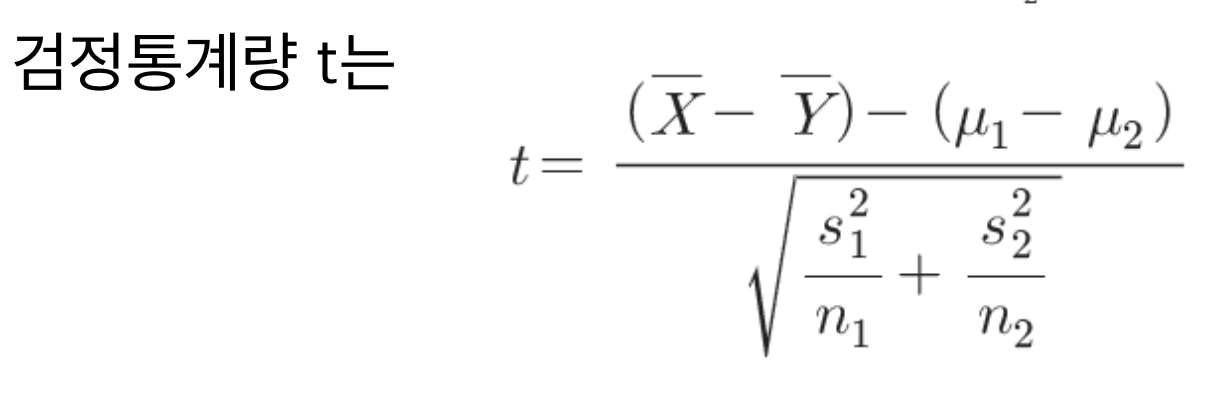

#상관 분석

In [ ]:
x = [8, 3, 6, 6, 9, 4, 3, 9, 3, 4]
y = [6, 2, 4, 6, 10, 5, 1, 8, 4, 5]

In [ ]:
stats.pearsonr(x, y)

PearsonRResult(statistic=0.862517279213578, pvalue=0.0013196539142000018)

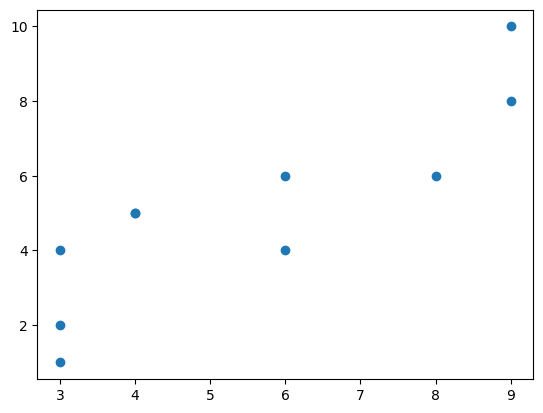

In [ ]:
plt.scatter(x,y)

상관 계수

    +  : 양의 상관


    0 : 임의 분포


    - : 음의 상관



In [ ]:
df2

sex  income  English  jobSatisfaction  stress
0    m    3000      500                5       5
1    f    4000      600                4       4
2    f    5000      700                3       2
3    m    6000      800                2       2
4    m    4000      700                2       5
5    m    3000      600                1       5
6    m    3000      500                3       1
7    m    5000      500                3       2
8    f    4999      600                4       3
9    f    5000      700                5       4
10   m    3000      500                5       5
11   m    4000      600                4       4
12   m    5000      700                3       2
13   m    6000      800                2       5
14   f    4000      700                2       4
15   f    3000      600                1       2
16   m    3000      500                3       2
17   m    5000      500                3       5
18   m    4999      600                4       5
19   m    5000      500                3       1
20   f    4999      600                4       2
21   f    5000      700                5       3
22   f    3000      500                5       4

In [ ]:
df2.corr(method='spearman')

<ipython-input-84-032969e374ae>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr(method='spearman')


income   English  jobSatisfaction    stress
income           1.000000  0.543705        -0.100683 -0.170584
English          0.543705  1.000000        -0.309747  0.068223
jobSatisfaction -0.100683 -0.309747         1.000000  0.154982
stress          -0.170584  0.068223         0.154982  1.000000

In [ ]:
df2.corr()

<ipython-input-85-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


income   English  jobSatisfaction    stress
income           1.000000  0.599452        -0.040108 -0.137920
English          0.599452  1.000000        -0.312051  0.073351
jobSatisfaction -0.040108 -0.312051         1.000000  0.165338
stress          -0.137920  0.073351         0.165338  1.000000

선형관계 아닌데, 증가하는 추세가 있는 자료

    피어슨 : 상관계수가 1이 아님

    스피어만 : 상관계수가 1일수 있음

    

#회귀분석

가정

    선형성 : 종속변수와 독립변수 간의 선형 관계

    독립성 : 독립 변수들 간의 통계적 독립성 (비 다중공선성)

    등분산성 : 잔차들의 분산이 일정

    정규성 : 잔차들의 분포가 정규 분포를 이룸
[출처] [통계학] 30. 선형 회귀 분석의 4가지 가정 - (1)|작성자 러닝머신

최소자승법 (Ordinary Least Squares, OLS)

=========


A



========

B

========

C

=======

귀무 가설 : $\beta_1 = 0$

대립 가설 : $\beta_1 \ne 0$


$\beta$ : 회귀계수

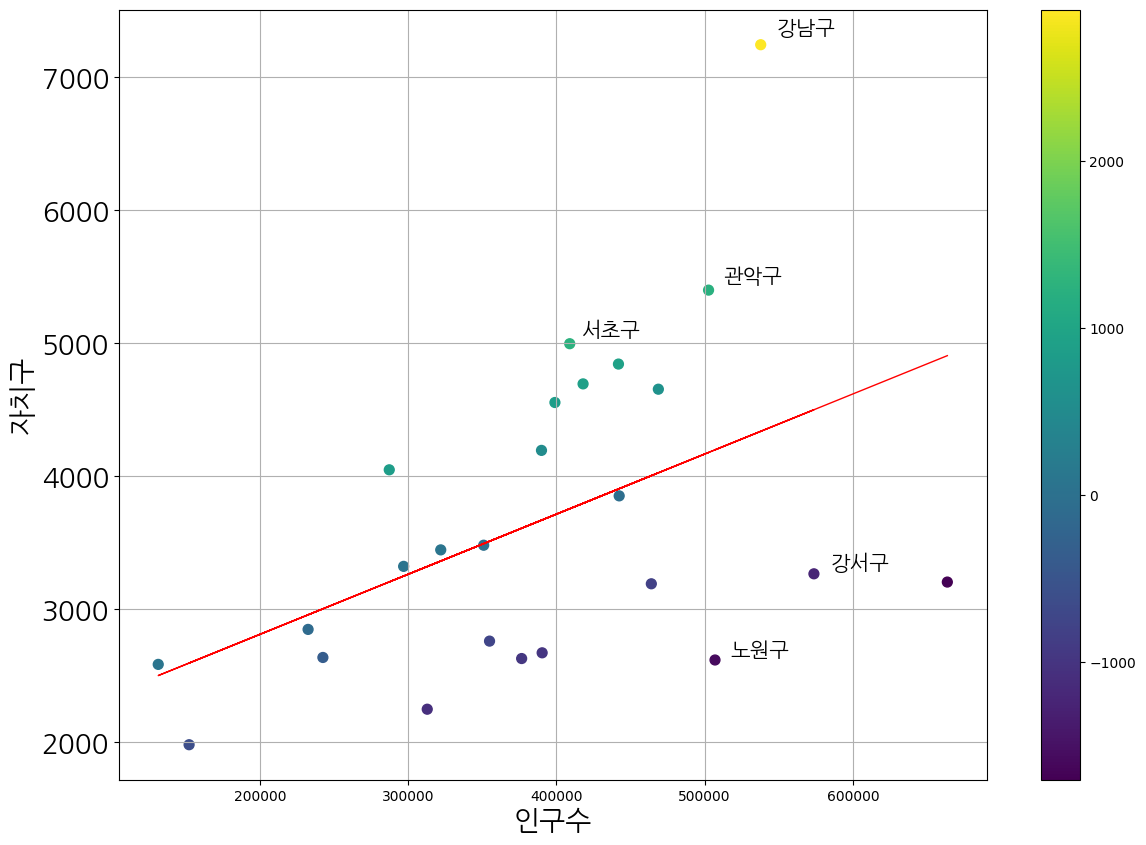

In [ ]:
from matplotlib import font_manager
font_path='./drive/MyDrive/NanumGothic.ttf'
fontprop = font_manager.FontProperties(fname=font_path, size=20)

plt.figure(figsize=(14,10))
plt.scatter(data_sort.total, data_sort.cctv_total,
            c=data_sort.res, s=50)
for n in range(3):
    plt.text(data_sort.loc[n,'total']*1.02, data_sort.loc[n,'cctv_total']*1.01,
             data_sort.loc[n, 'gu'], fontsize=15,fontproperties=fontprop)
for n in range(22,24):
    plt.text(data_sort.loc[n,'total']*1.02, data_sort.loc[n,'cctv_total']*1.01,
             data_sort.loc[n, 'gu'], fontsize=15,fontproperties=fontprop)
plt.plot(data_sort.total, data_sort.predict_lr, ls='-', lw=1, color='r')
plt.yticks(fontproperties=fontprop)
plt.ylabel('자치구', fontproperties=fontprop)
plt.xlabel('인구수', fontproperties=fontprop)
plt.colorbar()
plt.grid()
plt.show()

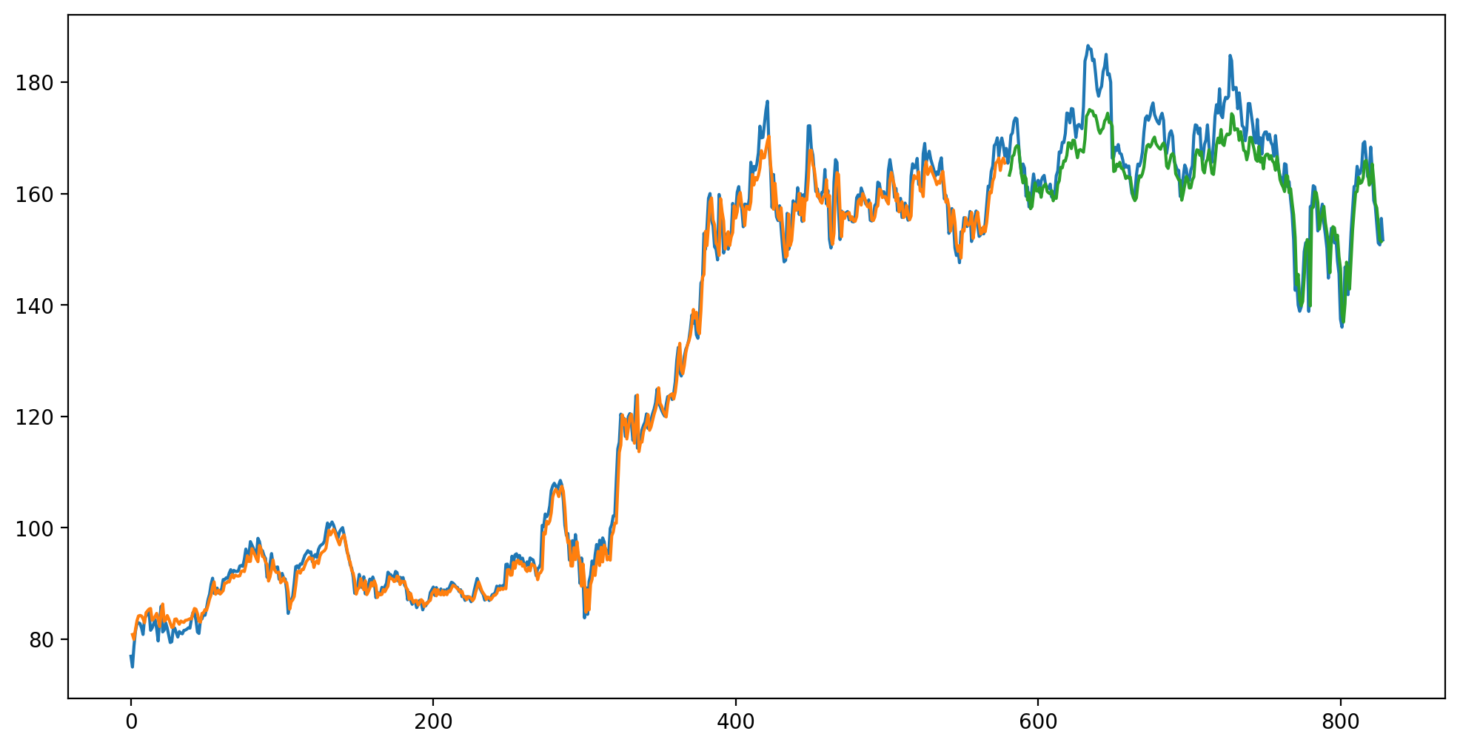

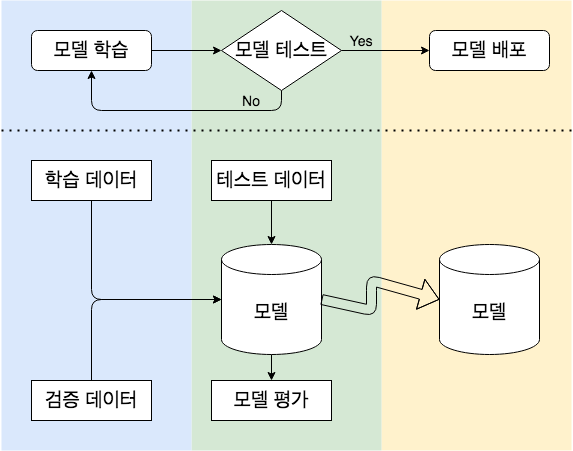

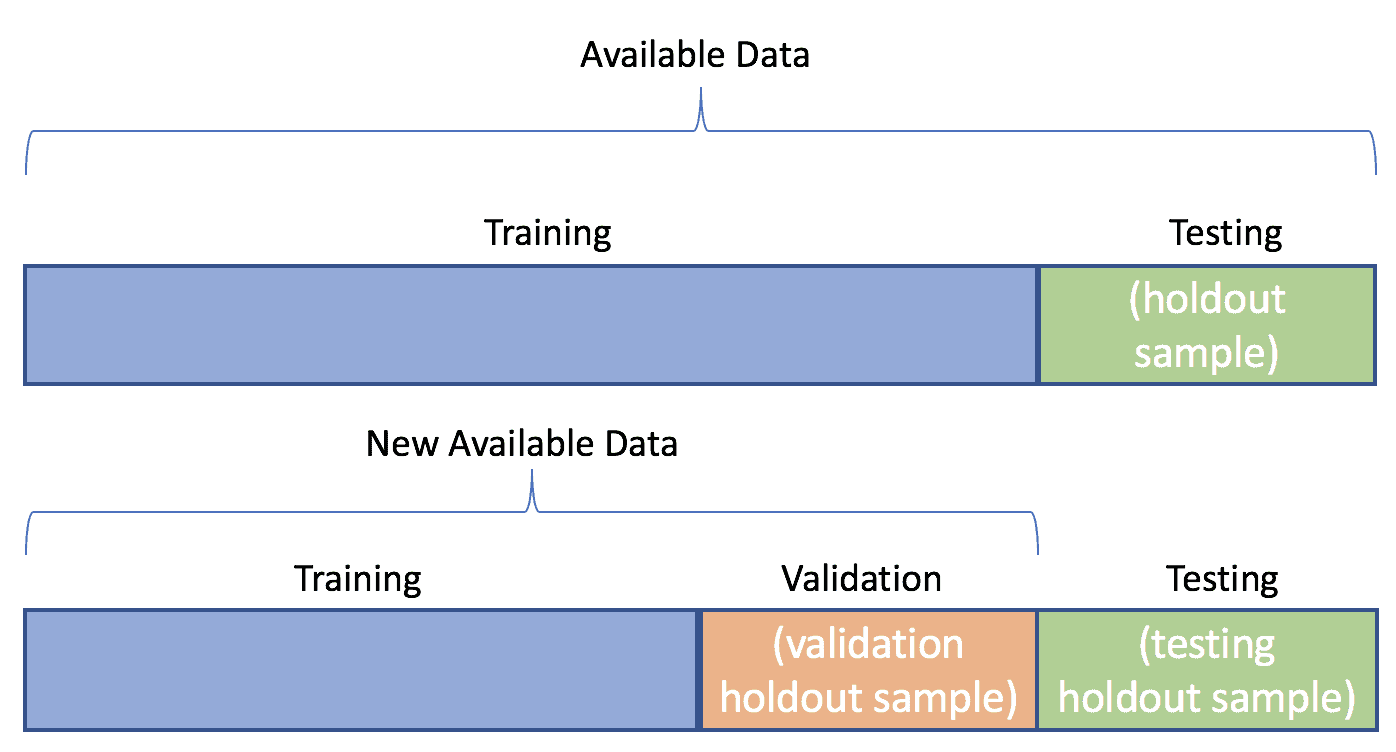

학습 : 어떤 작업의 성능이 경험을 통해서 향상되면 이것을 학습이라 한다.
<파이썬을 이용한 빅데이터 분석, 유성준>

관리자 패스워드 : zxc098